In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from tqdm import tqdm
from pprint import pprint
%matplotlib inline

from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split, cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
df20pffARI=pd.read_excel("data/CapstonePFFDatahelp.xlsx", sheet_name="ARI2020")
df20pffARI.dropna(inplace=True)
df20pffARI.tail()

,Week,Team,win,pf,pa,over,off,pass,pblk,recv,...,recvs,runs,rblks,defs,rdefs,tacks,prshs,covs,specs,Team 2
10,13.0,ARI,0.0,17,20,67.5,69.0,77.2,81.6,59.7,...,68.636364,68.527273,60.627273,56.736364,53.209091,58.772727,60.100000,58.627273,67.109091,LAR
11,14.0,ARI,1.0,28,38,54.0,57.9,51.9,52.8,57.9,...,67.741667,67.525000,61.308333,55.866667,52.958333,58.908333,59.641667,57.483333,69.025000,NYG
12,15.0,ARI,1.0,26,7,80.8,70.2,79.7,72.4,69.0,...,67.838462,66.507692,61.246154,57.923077,51.938462,58.815385,62.215385,58.830769,68.700000,PHI
13,16.0,ARI,0.0,33,26,75.4,78.5,82.8,71.2,84.7,...,69.042857,65.885714,60.978571,58.300000,52.414286,59.800000,62.435714,58.885714,68.642857,SF
14,17.0,ARI,0.0,12,20,48.3,57.5,66.5,63.2,52.7,...,67.953333,65.993333,60.486667,56.626667,50.893333,60.400000,63.200000,56.946667,68.880000,LAR


In [3]:
df20pffATL=pd.read_excel("data/CapstonePFFDatahelp.xlsx", sheet_name="ATL2020")
df20pffATL.dropna(inplace=True)
df20pffATL.tail()

,Week,Team,win,pf,pa,over,off,pass,pblk,recv,...,recvs,runs,rblks,defs,rdefs,tacks,prshs,covs,specs,Team 2
10,13.0,ATL,0.0,43,6,73.3,68.2,70.1,57.5,62.9,...,67.900000,59.009091,62.090909,62.072727,59.500000,58.227273,69.318182,59.163636,61.218182,NO
11,14.0,ATL,0.0,16,21,79.1,78.2,84.7,62.7,72.3,...,68.266667,59.650000,62.150000,62.641667,60.316667,58.658333,68.858333,59.658333,61.791667,LAR
12,15.0,ATL,0.0,17,20,72.7,65.3,61.6,69.5,66.9,...,68.161538,60.515385,61.200000,63.638462,61.361538,58.600000,68.161538,60.930769,61.646154,TB
13,16.0,ATL,0.0,27,31,69.6,75.2,80.4,71.5,76.8,...,68.778571,60.342857,59.485714,62.914286,60.978571,59.514286,67.157143,60.357143,62.092857,KC
14,17.0,ATL,0.0,14,17,61.8,71.1,67.1,48.8,73.4,...,69.086667,60.813333,60.133333,61.933333,59.860000,59.566667,66.353333,60.073333,63.286667,TB


In [4]:
df20pffBAL=pd.read_excel("data/CapstonePFFDatahelp.xlsx", sheet_name="BAL2020")
df20pffBAL.dropna(inplace=True)
df20pffBAL.tail()

,Week,Team,win,pf,pa,over,off,pass,pblk,recv,...,recvs,runs,rblks,defs,rdefs,tacks,prshs,covs,specs,Team 2
12,15.0,BAL,1.0,47,42,70.9,68.4,75.8,52.3,58.8,...,64.253846,67.792308,64.207692,61.192308,60.300000,56.630769,62.776923,60.646154,67.453846,JAX
13,16.0,BAL,1.0,40,14,79.5,75.1,71.2,84.7,72.4,...,64.835714,68.250000,63.950000,62.385714,61.428571,56.407143,63.164286,61.550000,66.807143,NYG
14,17.0,BAL,1.0,27,13,73.8,75.5,77.1,67.8,67.0,...,64.980000,69.160000,63.686667,62.493333,61.826667,57.153333,63.246667,61.520000,66.846667,CIN
15,18.0,BAL,1.0,38,3,87.6,85.0,86.9,68.0,62.3,...,64.812500,69.975000,64.925000,63.106250,61.431250,55.412500,63.618750,62.525000,67.425000,TEN
16,19.0,BAL,0.0,20,13,76.2,72.2,62.1,66.9,68.4,...,65.023529,70.176471,65.188235,63.652941,61.870588,56.358824,63.447059,63.311765,67.929412,BUF


In [5]:
df20pffBUF=pd.read_excel("data/CapstonePFFDatahelp.xlsx", sheet_name="BUF2020")
df20pffBUF.dropna(inplace=True)
df20pffBUF.tail()

,Week,Team,win,pf,pa,over,off,pass,pblk,recv,...,recvs,runs,rblks,defs,rdefs,tacks,prshs,covs,specs,Team 2
13,16.0,BUF,1.0,48,19,86.2,82.9,84.1,56.8,79.0,...,72.464286,67.350000,65.050000,61.042857,51.221429,59.364286,70.085714,61.592857,69.707143,NE
14,17.0,BUF,1.0,38,9,82.1,82.4,84.0,84.4,73.3,...,72.520000,67.253333,65.393333,61.186667,51.513333,57.773333,70.400000,61.433333,69.833333,MIA
15,18.0,BUF,1.0,56,26,82.3,81.0,85.6,58.7,77.7,...,72.843750,67.768750,64.843750,61.712500,52.581250,58.375000,69.456250,62.175000,69.718750,IND
16,19.0,BUF,1.0,27,24,73.9,82.1,90.3,84.3,73.0,...,72.852941,67.847059,64.476471,61.576471,52.111765,57.864706,69.047059,62.423529,68.276471,BAL
17,20.0,BUF,0.0,17,3,68.8,67.0,60.5,68.9,69.5,...,72.666667,67.427778,63.716667,61.961111,52.944444,57.116667,68.783333,62.677778,67.644444,KC


In [6]:
df20pffCAR=pd.read_excel("data/CapstonePFFDatahelp.xlsx", sheet_name="CAR2020")
df20pffCAR.dropna(inplace=True)
df20pffCAR.tail()

,Week,Team,win,pf,pa,over,off,pass,pblk,recv,...,recvs,runs,rblks,defs,rdefs,tacks,prshs,covs,specs,Team 2
10,12.0,CAR,0.0,20,0,74.2,73.3,65.8,73.0,66.4,...,65.954545,69.236364,62.572727,55.181818,54.690909,55.281818,66.672727,53.545455,67.581818,MIN
11,14.0,CAR,0.0,27,28,72.8,77.5,66.4,84.6,70.0,...,66.291667,69.033333,63.758333,56.108333,55.741667,56.066667,66.983333,54.133333,65.183333,DEN
12,15.0,CAR,0.0,27,32,63.5,65.2,62.1,65.9,64.3,...,66.138462,69.423077,63.153846,56.346154,57.061538,57.361538,66.592308,53.661538,64.446154,GB
13,16.0,CAR,1.0,16,24,54.8,55.8,57.7,47.2,55.7,...,65.392857,68.328571,63.042857,55.857143,55.207143,57.021429,65.871429,54.414286,65.485714,WAS
14,17.0,CAR,0.0,20,13,70.4,67.4,81.4,57.2,67.7,...,65.546667,67.700000,62.186667,56.706667,54.300000,57.026667,65.466667,56.093333,65.846667,NO


In [7]:
df20pffCHI=pd.read_excel("data/CapstonePFFDatahelp.xlsx", sheet_name="CHI2020")
df20pffCHI.dropna(inplace=True)
df20pffCHI.tail()

,Week,Team,win,pf,pa,over,off,pass,pblk,recv,...,recvs,runs,rblks,defs,rdefs,tacks,prshs,covs,specs,Team 2
11,14.0,CHI,1.0,30,34,75.3,74.3,57.5,61.4,73.5,...,66.158333,67.000000,61.991667,64.991667,63.475000,61.575000,69.741667,60.616667,68.416667,HOU
12,15.0,CHI,1.0,36,7,85.5,79.1,66.4,55.7,78.6,...,67.115385,66.876923,63.746154,66.030769,64.261538,62.507692,70.353846,61.292308,69.076923,MIN
13,16.0,CHI,1.0,33,27,77.0,74.9,64.8,74.3,73.2,...,67.550000,67.171429,63.892857,66.307143,64.835714,63.964286,70.907143,60.978571,69.021429,JAX
14,17.0,CHI,0.0,41,17,73.0,68.9,50.4,61.2,69.4,...,67.673333,67.340000,64.400000,66.706667,64.260000,62.560000,70.546667,62.066667,68.046667,GB
15,18.0,CHI,0.0,16,35,65.8,66.4,56.3,81.7,59.5,...,67.162500,68.025000,64.137500,65.962500,64.612500,62.262500,70.218750,60.662500,69.243750,NO


In [8]:
df20pffCIN=pd.read_excel("data/CapstonePFFDatahelp.xlsx", sheet_name="CIN2020")
df20pffCIN.dropna(inplace=True)
df20pffCIN.tail()

,Week,Team,win,pf,pa,over,off,pass,pblk,recv,...,recvs,runs,rblks,defs,rdefs,tacks,prshs,covs,specs,Team 2
9,13.0,CIN,0.0,17,19,63.3,51.4,50.5,51.3,55.3,...,64.850000,61.070000,65.160000,56.950000,53.540000,61.610000,58.220000,61.240000,70.870000,MIA
10,14.0,CIN,0.0,7,19,59.5,56.6,39.9,40.7,65.3,...,64.890909,61.518182,64.881818,57.481818,54.909091,60.627273,58.154545,61.018182,70.209091,DAL
11,15.0,CIN,1.0,7,30,65.4,57.1,59.9,68.1,62.8,...,64.716667,60.125000,63.650000,59.400000,57.233333,61.633333,60.075000,61.291667,68.525000,PIT
12,16.0,CIN,1.0,27,17,82.8,67.2,70.1,37.9,69.6,...,65.092308,60.761538,63.292308,61.738462,58.300000,63.084615,61.576923,63.484615,68.892308,HOU
13,17.0,CIN,0.0,37,31,73.9,78.3,90.3,76.1,74.1,...,65.735714,61.392857,62.685714,61.242857,57.764286,61.585714,61.807143,62.757143,68.785714,BAL


In [9]:
# df20pffCIN.columns

In [10]:
pffdf3=pd.read_excel("data/CapstonePFFDatahelp.xlsx", sheet_name=None)


pffdf1=pd.concat(pffdf3, ignore_index=True)
pffdf1.dropna(inplace=True)
pffdf2=pffdf1
pffdf=pd.merge(pffdf1, pffdf2, how='left', left_on=['Week','Team 2'], right_on=['Week', 'Team'])
pffdf.head()

,Week,Team_x,win_x,pf_x,pa_x,over_x,off_x,pass_x,pblk_x,recv_x,...,recvs_y,runs_y,rblks_y,defs_y,rdefs_y,tacks_y,prshs_y,covs_y,specs_y,Team 2_y
0,2.0,ARI,1.0,24.0,20.0,62.6,63.6,60.1,67.5,62.2,...,67.80,56.500000,60.300000,63.700000,60.70,53.200000,74.800000,60.400000,59.500000,ARI
1,3.0,ARI,0.0,30.0,15.0,61.7,62.4,68.8,60.5,66.6,...,62.95,59.950000,73.300000,47.600000,47.85,56.000000,62.950000,47.200000,67.450000,ARI
2,4.0,ARI,0.0,23.0,26.0,64.6,75.7,68.1,71.0,76.8,...,67.50,68.066667,54.233333,48.266667,40.40,45.966667,61.966667,53.833333,67.366667,ARI
3,5.0,ARI,1.0,21.0,31.0,60.2,62.0,72.0,58.9,59.2,...,59.50,67.175000,62.500000,57.025000,62.65,43.025000,66.100000,51.975000,68.575000,ARI
4,6.0,ARI,1.0,30.0,10.0,69.4,81.4,76.1,87.3,79.3,...,72.84,68.340000,60.900000,52.520000,56.16,60.780000,65.920000,49.660000,68.460000,ARI


In [11]:
#pffdf.to_csv('lostdata.csv')

In [12]:
pffdf.tail()

,Week,Team_x,win_x,pf_x,pa_x,over_x,off_x,pass_x,pblk_x,recv_x,...,recvs_y,runs_y,rblks_y,defs_y,rdefs_y,tacks_y,prshs_y,covs_y,specs_y,Team 2_y
499,14.0,WAS,1.0,23.0,17.0,68.7,59.7,73.4,53.8,62.0,...,72.108333,66.141667,69.400000,64.158333,63.066667,66.875000,62.558333,63.733333,65.250000,WAS
500,15.0,WAS,0.0,23.0,15.0,65.8,64.4,40.3,86.0,57.7,...,71.515385,68.015385,66.653846,63.053846,68.930769,66.446154,61.607692,59.300000,69.276923,WAS
501,16.0,WAS,0.0,15.0,20.0,67.8,64.0,63.6,83.7,61.1,...,65.392857,68.328571,63.042857,55.857143,55.207143,57.021429,65.871429,54.414286,65.485714,WAS
502,17.0,WAS,1.0,13.0,20.0,71.0,65.4,57.4,84.1,56.3,...,63.421429,66.207143,63.607143,60.107143,57.635714,51.114286,72.614286,54.371429,72.750000,WAS
503,18.0,WAS,0.0,20.0,14.0,67.7,65.7,64.5,75.8,57.8,...,70.506250,68.106250,65.006250,66.318750,64.231250,56.681250,68.662500,63.050000,63.056250,WAS


In [13]:
df20t= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall.csv')

df20t['Team']

0      NO
1      TB
2      GB
3     BUF
4     SEA
5      KC
6     BAL
7     PIT
8     LAR
9     IND
10     SF
11    MIA
12    ARI
13    TEN
14    CHI
15    WAS
16    ATL
17    CLE
18     LV
19    MIN
20    CAR
21     NE
22    DAL
23    HOU
24    NYG
25    LAC
26    DET
27    PHI
28    DEN
29    CIN
30    JAX
31    NYJ
Name: Team, dtype: object

In [14]:
match1=pffdf[pffdf['Week']==2]
match2=pffdf[pffdf['Week']==3]
match3=pffdf[pffdf['Week']==4]
match4=pffdf[pffdf['Week']==5]
match5=pffdf[pffdf['Week']==6]
match6=pffdf[pffdf['Week']==7]
match7=pffdf[pffdf['Week']==8]
match8=pffdf[pffdf['Week']==9]
match9=pffdf[pffdf['Week']==10]
match10=pffdf[pffdf['Week']==11]
match11=pffdf[pffdf['Week']==12]
match12=pffdf[pffdf['Week']==13]
match13=pffdf[pffdf['Week']==14]
match14=pffdf[pffdf['Week']==15]
match15=pffdf[pffdf['Week']==16]
match16=pffdf[pffdf['Week']==17]
matchplayoffs1=pffdf[pffdf['Week']==18]
matchplayoffs2=pffdf[pffdf['Week']==19]
matchplayoffs3=pffdf[pffdf['Week']==20]
matchplayoffs4=pffdf[pffdf['Week']==21]
# match1.to_csv('match1.csv')
# match2.to_csv('match2.csv')
# match3.to_csv('match3.csv')
# match4.to_csv('match4.csv')
# match5.to_csv('match5.csv')
# match6.to_csv('match6.csv')
# match7.to_csv('match7.csv')
# match8.to_csv('match8.csv')
# match9.to_csv('match9.csv')
# match10.to_csv('match10.csv')
# match11.to_csv('match11.csv')
# match12.to_csv('match12.csv')
# match13.to_csv('match13.csv')
# match14.to_csv('match14.csv')
# match15.to_csv('match15.csv')
# match16.to_csv('match16.csv')
# matchplayoffs1.to_csv('matchplayoffs1.csv')
# matchplayoffs2.to_csv('matchplayoffs2.csv')
# matchplayoffs3.to_csv('matchplayoffs3.csv')
# matchplayoffs4.to_csv('matchplayoffs4.csv')
# matchplayoffs1
# matchplayoffs2
# matchplayoffs2.append(matchplayoffs1)
# matchplayoffs3.append(matchplayoffs2)
# matchplayoffs4.append(matchplayoffs3)
matchplayoffs=pd.concat([matchplayoffs4, matchplayoffs3, matchplayoffs2, matchplayoffs1])
matchplayoffs

,Week,Team_x,win_x,pf_x,pa_x,over_x,off_x,pass_x,pblk_x,recv_x,...,recvs_y,runs_y,rblks_y,defs_y,rdefs_y,tacks_y,prshs_y,covs_y,specs_y,Team 2_y
252,21.0,KC,0.0,38.0,24.0,77.4,79.9,91.1,71.2,70.9,...,69.526316,68.284211,64.168421,66.110526,63.268421,57.194737,67.273684,64.200000,61.931579,KC
471,21.0,TB,1.0,31.0,26.0,73.5,72.7,82.9,60.2,69.5,...,71.833333,67.922222,64.866667,61.733333,56.911111,58.311111,63.277778,62.044444,64.433333,TB
64,20.0,BUF,0.0,17.0,3.0,68.8,67.0,60.5,68.9,69.5,...,71.888235,67.805882,65.194118,61.394118,57.005882,58.141176,63.570588,61.258824,63.870588,BUF
188,20.0,GB,0.0,32.0,18.0,80.7,83.9,77.2,86.2,76.4,...,69.527778,68.022222,64.927778,66.038889,63.338889,56.916667,67.194444,64.116667,62.405556,GB
251,20.0,KC,1.0,22.0,17.0,72.9,77.2,61.3,74.9,74.7,...,72.666667,67.427778,63.716667,61.961111,52.944444,57.116667,68.783333,62.677778,67.644444,KC
470,20.0,TB,1.0,30.0,20.0,68.4,66.0,70.8,48.1,59.6,...,70.182353,69.688235,67.264706,64.229412,59.300000,57.929412,66.105882,63.835294,61.370588,TB
46,19.0,BAL,0.0,20.0,13.0,76.2,72.2,62.1,66.9,68.4,...,72.852941,67.847059,64.476471,61.576471,52.111765,57.864706,69.047059,62.423529,68.276471,BAL
63,19.0,BUF,1.0,27.0,24.0,73.9,82.1,90.3,84.3,73.0,...,65.023529,70.176471,65.188235,63.652941,61.870588,56.358824,63.447059,63.311765,67.929412,BUF
126,19.0,CLE,0.0,48.0,37.0,72.8,78.9,89.9,72.6,65.7,...,71.712500,67.075000,65.106250,61.231250,58.056250,58.756250,63.693750,60.381250,63.750000,CLE
187,19.0,GB,1.0,35.0,16.0,83.7,74.7,76.2,65.4,77.4,...,67.141176,66.200000,68.747059,72.000000,65.264706,66.982353,72.541176,67.388235,65.888235,GB


In [15]:
df20t1c= pd.read_csv('./Data/2020_Team_DVOA_Ratings_ Overall_ after_Week_1_convert.csv')
df20t1c.dtypes
df20t1c['Team'][0], df20t1c['Team 2'][0]

('BAL', 'HOU')

In [16]:
#df20t1c['TotalDVOAteam1']=df20t1c['TotalDVOAteam1'].astype('float64')
#df20t1c['TotalDVOAteam1']=pd.to_numeric(df20t1c['TotalDVOAteam1'], errors='coerce')
# df20t1c['TotalDVOAteam1'].dtypes

In [17]:
df20t1c['Team1ML']=[-350, 180, 260, -210, -300,
                    270,-240, 175, -200, 160,
                    350, 320, -220, -140, 250,
                    -420, -300, -330, -335, 110,
                    -310, -380, 250, 120, -180,
                    220, 275, -130, 200, 190,
                    -260,290]
df20t1c['Team2ML']=[290, -210, -310, 180, 250,
                    -330, 200, -200, 175, -180,
                    -420, -380, 190, 120, -300,
                    350, 250, 270, 275, -130, 
                    260, 320, -300, -140, 160,
                    -260, -335, 110, -240, -220,
                    220, -350]

In [18]:
df20t1c=pd.merge(df20t1c, match1, how='left', left_on=['Team'], right_on=['Team_x'])
df20t1c.shape

(32, 106)

In [19]:
match1.shape

(32, 67)

In [20]:
df20t1c.isnull().sum()

Team                     0
W-L                      0
TotalDVOARankteam1       0
TotalDVOAteam1           0
WeightedDVOARankteam1    0
                        ..
tacks_y                  0
prshs_y                  0
covs_y                   0
specs_y                  0
Team 2_y                 0
Length: 106, dtype: int64

In [21]:
df20t1= pd.read_csv('./Data/2020_Team_DVOA_Ratings_ Overall_ after_Week_1.csv')
df20t1b=df20t1
#df20t1b=df20t1b.reindex(['19', '3', '21', '3', '23', '17', '29', '8', '7', '25', '15', '22', '30', '24', '16']) #,"10", '14','5', '27', '0', '28', '2', '11, "4", "13", "9", "31", "18", "20", "6", "12", "26"])
df20t1b  

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,BAL,1-0,1,88.0%,1,88.0%,1,39.9%,1,39.9%,3,-38.8%,3,-38.8%,2,9.4%,2,9.4%
1,NE,1-0,2,52.3%,2,52.3%,3,36.4%,3,36.4%,5,-23.8%,5,-23.8%,25,-7.9%,25,-7.9%
2,JAX,1-0,3,38.0%,3,38.0%,4,35.8%,4,35.8%,13,0.5%,13,0.5%,5,2.8%,5,2.8%
3,SEA,1-0,4,37.0%,4,37.0%,2,38.6%,2,38.6%,21,9.5%,21,9.5%,3,7.8%,3,7.8%
4,PIT,1-0,5,36.0%,5,36.0%,14,6.5%,14,6.5%,2,-39.0%,2,-39.0%,27,-9.4%,27,-9.4%
5,WAS,1-0,6,35.9%,6,35.9%,28,-32.7%,28,-32.7%,1,-69.4%,1,-69.4%,13,-0.8%,13,-0.8%
6,BUF,1-0,7,16.7%,7,16.7%,17,2.6%,17,2.6%,7,-19.0%,7,-19.0%,22,-4.8%,22,-4.8%
7,LV,1-0,8,13.7%,8,13.7%,5,31.7%,5,31.7%,23,16.5%,23,16.5%,15,-1.4%,15,-1.4%
8,NO,1-0,9,10.8%,9,10.8%,24,-13.7%,24,-13.7%,9,-14.3%,9,-14.3%,1,10.2%,1,10.2%
9,MIN,0-1,10,10.8%,10,10.8%,6,28.2%,6,28.2%,26,20.1%,26,20.1%,6,2.7%,6,2.7%


In [22]:
df20t2= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_2.csv')
df20t2

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,BAL,2-0,1,60.6%,1,60.6%,5,23.3%,5,23.3%,3,-31.1%,3,-31.1%,3,6.2%,3,6.2%
1,SEA,2-0,2,34.1%,2,34.1%,2,34.9%,2,34.9%,24,9.9%,24,9.9%,1,9.1%,1,9.1%
2,PIT,2-0,3,32.4%,3,32.4%,14,-1.1%,14,-1.1%,2,-35.3%,2,-35.3%,19,-1.9%,19,-1.9%
3,GB,2-0,4,25.5%,4,25.5%,1,36.7%,1,36.7%,26,12.0%,26,12.0%,12,0.8%,12,0.8%
4,LAR,2-0,5,23.7%,5,23.7%,3,30.8%,3,30.8%,14,-1.4%,14,-1.4%,29,-8.5%,29,-8.5%
5,BUF,2-0,6,23.5%,6,23.5%,7,20.7%,7,20.7%,12,-5.0%,12,-5.0%,20,-2.2%,20,-2.2%
6,NO,1-1,7,18.6%,7,18.6%,12,6.5%,12,6.5%,10,-6.8%,10,-6.8%,4,5.3%,4,5.3%
7,IND,1-1,8,13.1%,8,13.1%,21,-6.6%,21,-6.6%,5,-18.2%,5,-18.2%,10,1.6%,10,1.6%
8,NE,1-1,9,11.7%,9,11.7%,4,27.5%,4,27.5%,19,6.9%,19,6.9%,30,-9.0%,30,-9.0%
9,KC,2-0,10,10.4%,10,10.4%,8,15.7%,8,15.7%,23,9.7%,23,9.7%,5,4.4%,5,4.4%


In [23]:
df20t2c= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_2 _convert.csv')
df20t2c[['Team']].tail(12), df20t2c[['Team 2']].tail(12)

(   Team
 18  LAC
 19   LV
 20  ATL
 21  HOU
 22  CAR
 23  DET
 24  MIN
 25  NYG
 26  NYJ
 27  CLE
 28  DEN
 29  MIA,
    Team 2
 18    CAR
 19     NE
 20    CHI
 21    PIT
 22    LAC
 23    ARI
 24    TEN
 25     SF
 26    IND
 27    WAS
 28     TB
 29    JAX)

In [24]:
df20t2c['Team1ML']=[-180, -240, -190, 155, 110,
                    -130, -175, -700, -330, 160,
                    -265, -140, -150, 200, -160,
                    270, -240, 120, -270, 270,
                    -140, 170, 230, 200, 130,
                    140, 500, -330, 225,
                    120]

df20t2c['Team2ML']=[160, 200, -170, -175, -130,
                    110, 155, 500, 270, -180,
                    225, 120, 130, -240, 140,
                    -330, 200, -140, 230, -330,
                    120, -190, -270, -240, -150,
                    -160, -700, 270, -265,
                    -140]

print(df20t2c.columns)
print(df20t2c.dtypes)

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML'],
      dtype='object')
Team            

In [25]:
df20t2c=pd.merge(df20t2c, match2, how='left', left_on=['Team'], right_on=['Team_x'])

In [26]:
df20t3= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_3.csv')
df20t3

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,IND,2-1,1,35.2%,1,35.2%,18,-0.7%,18,-0.7%,1,-32.3%,1,-32.3%,10,3.6%,10,3.6%
1,PIT,3-0,2,32.0%,2,32.0%,14,4.4%,14,4.4%,3,-26.9%,3,-26.9%,13,0.8%,13,0.8%
2,SF,2-1,3,30.1%,3,30.1%,8,11.3%,8,11.3%,5,-18.9%,5,-18.9%,15,-0.1%,15,-0.1%
3,SEA,3-0,4,26.7%,4,26.7%,3,27.3%,3,27.3%,23,7.3%,23,7.3%,2,6.8%,2,6.8%
4,TB,2-1,5,25.4%,5,25.4%,16,2.2%,16,2.2%,2,-28.6%,2,-28.6%,27,-5.4%,27,-5.4%
5,BAL,2-1,6,24.2%,6,24.2%,13,4.9%,13,4.9%,10,-4.8%,10,-4.8%,1,14.5%,1,14.5%
6,LAR,2-1,7,21.0%,7,21.0%,1,34.6%,1,34.6%,21,5.4%,21,5.4%,31,-8.1%,31,-8.1%
7,GB,3-0,8,20.4%,8,20.4%,2,27.8%,2,27.8%,28,11.7%,28,11.7%,7,4.4%,7,4.4%
8,KC,3-0,9,17.2%,9,17.2%,5,25.2%,5,25.2%,13,-0.1%,13,-0.1%,30,-8.1%,30,-8.1%
9,BUF,3-0,10,16.5%,10,16.5%,6,22.3%,6,22.3%,24,8.8%,24,8.8%,11,3.1%,11,3.1%


In [27]:
df20t3c= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_3_convert.csv')
df20t3c.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team'],
      dtype='object')

In [28]:
print(df20t3c[['Team']].tail(10)), print(df20t3c[['Team 2']].tail(10))

   Team
20  HOU
21  MIN
22   LV
23  MIA
24  WAS
25  CAR
26  PHI
27  NYG
28  NYJ
29  DEN
   Team 2
20    MIN
21    HOU
22    BUF
23    SEA
24    BAL
25    ARI
26     SF
27    LAR
28    DEN
29    NYJ


(None, None)

In [29]:
df20t3c['Team1ML']=[-185, -330, -210, -360, -1400,
                    -1100, -220, -650, -170, -160,
                    475, -175, 300, -165, 165,
                    100, 155, -120, 190, 140,
                    -170, 150, 270, 180, 800,
                    145, 270, 700, 115, -105]

df20t3c['Team2ML']=[165, 270, 180, 300, 800,
                    700, 190, 475, 150, 140,
                    -650, 155, -360, 145, -185,
                    -120, -175, 100, -220, -160,
                    150, -170, -330, -210, -1400,
                    -165, -330, -1100, -105, 115]


In [30]:
df20t3c=pd.merge(df20t3c, match3, how='left', left_on=['Team'], right_on=['Team_x'])
df20t3c.shape

(30, 106)

In [31]:
df20t4= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_4.csv')
df20t4b=df20t4

df20t4b.describe()
# #put win loss
df20t4b=(df20t4b.drop(index=[4,16,23,30]))
df20t4b.describe()
df20t4b['W-L']=[0,0,1,0,1,
                1,1,0,0,1,
                1,0,1,0,1,
                0,1,0,1,1,
                1,1,1,0,0,
                0,0,0]
df20t4b.describe()
df20t4d=df20t4b
df20t4b.describe()
#Change column name
df20t4b=df20t4b.rename(columns={'Team':'Team', 'W-L':'W-L','Total DVOA Rank':'TotalDVOARankteam1', ' Total DVOA ':'TotalDVOAteam1','Weighted DVOA Rank':'WeightedDVOARankteam1','Weighted DVOA':'WeightedDVOAteam1', 'Offense DVOA Rank':'OffenseDVOARankteam1','Offense DVOA':'Offense DVOAteam1','Offense Weighted DVOA Rank':'OffenseWeightedDVOARankteam1','Offense Weighted DVOA':'OffenseWeightedDVOAteam1', 'Defense DVOA Rank':'DefenseDVOARankteam1','Defense DVOA':'DefenseDVOAteam1','Defense Weighted DVOA Rank':'DefenseWeightedDVOARankteam1', 'Defense Weighted DVOA':'DefenseWeightedDVOAteam1','Special Teams DVOA Rank':'SpecialTeamsDVOARankteam1', 'Special Teams DVOA': 'Special Teams DVOA','Special Teams Weighted DVOA Rank':'SpecialTeamsWeightedDVOARankteam1', 'Special Teams Weighted DVOA':'SpecialTeamsWeightedDVOAteam1'})
df20t4b.columns
df20t4b['Team 2']=['CHI', 'LV', 'CIN', 'CLE', 'MIN', 'PHI', 'LAC', 'MIA', 'TEN', 'WAS', 'IND', 'SEA', 'BUF', 'HOU', 'NYG', 'NO', 'ATL', 'BAL', 'JAX', 'TB', 'NYJ', 'KC', 'SF', 'CAR', 'LAR', 'ARI', 'PIT', 'DAL']
                                 
# ''Team', 'W-L', 'Total DVOA Rank', 'Total DVOA', 'Weighted DVOA Rank',
#        'Weighted DVOA', 'Offense DVOA Rank', 'Offense DVOA',
#        'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
#        'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
#        'Defense Weighted DVOA',
#                                  'Special Teams DVOA Rank',
#                                    'Special Teams DVOA', 
#                                  'Special Teams Weighted DVOA Rank',
#                                'Special Teams Weighted DVOA'                               
                                
#                                  'Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
#        'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
#        'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
#        'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
#        'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
#        'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
#        'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1'
#change column name
df20t4d['Home 1st team']=[0,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0]
#change win loss
df20t4d=df20t4d.rename(columns={'W-L':'W-L.1', ' Total DVOA ':'Total DVOA', 'Special Teams DVOA':'Special Teams DVOA.1', 'Team':'Team 2'})
#df20t4d['Team 2']=['CHI', 'LV', 'CIN', 'CLE', 'MIN', 'PHI', 'LAC', 'MIA', 'TEN', 'WAS', 'IND', 'SEA', 'BUF', 'HOU', 'NYG', 'NO', 'ATL', 'BAL', 'JAX', 'TB', 'NYJ', 'KC', 'SF', 'CAR', 'LAR', 'ARI', 'PIT', 'DAL']
#df20t4d['W-L.1']=[1,1,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,1,1,1,1]
#add home field
#merge on  opponent team
df20t4c=pd.merge(df20t4b, df20t4d, how='outer' ,on=['Team 2'])

df20t4c.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team'],
      dtype='object')

In [32]:


df20t4c.isnull().sum()
df20t4c.shape

(28, 37)

In [33]:
print(df20t4c[['Team']].tail(28)), print(df20t4c[['Team 2']].tail(28))

   Team
0    TB
1    KC
2   BAL
3   IND
4   SEA
5   PIT
6    NO
7    SF
8   BUF
9   LAR
10  CLE
11  MIN
12  TEN
13  JAX
14  DAL
15  LAC
16  CAR
17  CIN
18  HOU
19  CHI
20  ARI
21   LV
22  MIA
23  ATL
24  WAS
25  NYJ
26  PHI
27  NYG
   Team 2
0     CHI
1      LV
2     CIN
3     CLE
4     MIN
5     PHI
6     LAC
7     MIA
8     TEN
9     WAS
10    IND
11    SEA
12    BUF
13    HOU
14    NYG
15     NO
16    ATL
17    BAL
18    JAX
19     TB
20    NYJ
21     KC
22     SF
23    CAR
24    LAR
25    ARI
26    PIT
27    DAL


(None, None)

In [34]:


df20t4c['Team1ML']=[-190, -550, -750, 100, -290,
                    -360, -335, -370, -160, -330,
                    -120, 245, 140, 220, -340,
                    275, 130, 525, -260, 170,
                    -320, 425, 310, -150, 270,
                    265, 300, 280,]

df20t4c['Team2ML']=[170, 425, 525, -120, 245,
                    300, 275, 310, 140, 270, 
                    100, -290, -160, -260, 280,
                    -335, -150, -750, 220, -190,
                    265, -550, -370, 130, -330,
                    -320, -360, -340]


In [35]:
df20t4c=pd.merge(df20t4c, match4, how='left', left_on=['Team'], right_on=['Team_x'])
df20t4c.shape

(28, 106)

In [36]:
df20t5= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_5.csv')
df20t5

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA
0,BAL,4-1,1,34.0%,1,34.0%,17,3.6%,17,3.6%,3,-19.0%,3,-19.0%,1,11.4%,1,11.4%
1,TB,3-2,2,26.8%,2,26.8%,11,7.2%,11,7.2%,2,-21.0%,2,-21.0%,20,-1.4%,20,-1.4%
2,SEA,5-0,3,25.8%,3,25.8%,3,23.6%,3,23.6%,19,3.4%,19,3.4%,4,5.7%,4,5.7%
3,LAR,4-1,4,24.4%,4,24.4%,4,21.8%,4,21.8%,8,-7.3%,8,-7.3%,29,-4.7%,29,-4.7%
4,KC,4-1,5,24.3%,5,24.3%,2,25.6%,2,25.6%,9,-4.0%,9,-4.0%,30,-5.3%,30,-5.3%
5,GB,4-0,6,24.0%,6,24.0%,1,31.2%,1,31.2%,29,10.2%,29,10.2%,8,3.0%,8,3.0%
6,IND,3-2,7,23.9%,7,23.9%,25,-9.2%,25,-9.2%,1,-24.4%,1,-24.4%,2,8.6%,2,8.6%
7,NO,3-2,8,18.4%,8,18.4%,16,4.4%,16,4.4%,6,-9.2%,6,-9.2%,5,4.8%,5,4.8%
8,PIT,4-0,9,16.7%,9,16.7%,13,6.0%,13,6.0%,7,-9.2%,7,-9.2%,11,1.6%,11,1.6%
9,TEN,4-0,10,15.7%,10,15.7%,5,12.7%,5,12.7%,12,-1.7%,12,-1.7%,12,1.3%,12,1.3%


In [37]:
df20t5= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_5a.csv')
df20t5b=df20t5

#print(df20t5b['Team'])
#put win loss
df20t5b=(df20t5b.drop(index=[2,7,20,21]))
#df20t5d=df20t5b
# df20t5b.describe()

df20t5b['W-L']=[1,1,0,1,0,
                1,1,1,0,0,
                1,0,0,0,0,
                1,1,0,1,1,
                1,0,0,0,1,
                0,1,0]
# # df20t5b.describe()
df20t5d=df20t5b
# # df20t5b.describe()
#  #Change column name
df20t5b=df20t5b.rename(columns={'Team':'Team', 'W-L':'W-L','Total DVOA Rank':'TotalDVOARankteam1', 'Total DVOA':'TotalDVOAteam1','Weighted DVOA Rank':'WeightedDVOARankteam1','Weighted DVOA':'WeightedDVOAteam1', 'Offense DVOA Rank':'OffenseDVOARankteam1','Offense DVOA':'Offense DVOAteam1','Offense Weighted DVOA Rank':'OffenseWeightedDVOARankteam1','Offense Weighted DVOA':'OffenseWeightedDVOAteam1', 'Defense DVOA Rank':'DefenseDVOARankteam1','Defense DVOA':'DefenseDVOAteam1','Defense Weighted DVOA Rank':'DefenseWeightedDVOARankteam1', 'Defense Weighted DVOA':'DefenseWeightedDVOAteam1','Special Teams DVOA Rank':'SpecialTeamsDVOARankteam1', 'Special Teams DVOA': 'Special Teams DVOA','Special Teams Weighted DVOA Rank':'SpecialTeamsWeightedDVOARankteam1', 'Special Teams Weighted DVOA':'SpecialTeamsWeightedDVOAteam1'})
# # df20t5b.columns
df20t5b['Team 2']=['PHI', 'GB', 'SF', 'BUF', 'TB', 'CIN', 'CLE', 'HOU', 'ATL', 'TEN', 'NYJ', 'CHI', 'KC', 'ARI', 'PIT', 'DAL', 'LAR', 'DEN', 'CAR', 'JAX', 'MIN', 'DET', 'IND', 'NYG', 'WAS', 'BAL', 'NE', 'MIA']
                                 
# # # ''Team', 'W-L', 'Total DVOA Rank', 'Total DVOA', 'Weighted DVOA Rank',
# # #        'Weighted DVOA', 'Offense DVOA Rank', 'Offense DVOA',
# # #        'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
# # #        'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
# # #        'Defense Weighted DVOA',
# # #                                  'Special Teams DVOA Rank',
# # #                                    'Special Teams DVOA', 
# # #                                  'Special Teams Weighted DVOA Rank',
# # #                                'Special Teams Weighted DVOA'                               
                                
# # #                                  'Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
# # #        'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
# # #        'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
# # #        'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
# # #        'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
# # #        'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
# # #        'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1'
# # #change column name
df20t5b.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2'],
      dtype='object')

In [38]:

# # #change win loss
df20t5d=df20t5d.rename(columns={'W-L':'W-L.1', 'Special Teams DVOA':'Special Teams DVOA.1', 'Team':'Team 2'})
# # #df20t4d['Team 2']=['CHI', 'LV', 'CIN', 'CLE', 'MIN', 'PHI', 'LAC', 'MIA', 'TEN', 'WAS', 'IND', 'SEA', 'BUF', 'HOU', 'NYG', 'NO', 'ATL', 'BAL', 'JAX', 'TB', 'NYJ', 'KC', 'SF', 'CAR', 'LAR', 'ARI', 'PIT', 'DAL']
# df20t5d['W-L.1']=[0,0,1,0,1,
#                 0,0,0,1,1,
#                 0,1,1,1,1,
#                 0,0,1,0,0,
#                 0,1,1,1,0,
#                 1,0,1]
# # #add home field
# # #merge on  opponent team
df20t5c=pd.merge(df20t5b, df20t5d, how='outer' ,on=['Team 2'])

df20t5c.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA'],
      dtype='object')

In [39]:

df20t5c['Home 1st team']=[0,1,0,0,0,1,1,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0]

In [40]:
df20t5c[['Team', 'W-L', 'Team 2', 'W-L.1', 'Home 1st team']]

,Team,W-L,Team 2,W-L.1,Home 1st team
0,BAL,1,PHI,0,0
1,TB,1,GB,0,1
2,LAR,0,SF,1,0
3,KC,1,BUF,0,0
4,GB,0,TB,1,0
5,IND,1,CIN,0,1
6,PIT,1,CLE,0,1
7,TEN,1,HOU,0,1
8,MIN,0,ATL,1,1
9,HOU,0,TEN,1,0


In [41]:
df20t5c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,Offense Weighted DVOA,Defense DVOA Rank,Defense DVOA,Defense Weighted DVOA Rank,Defense Weighted DVOA,Special Teams DVOA Rank,Special Teams DVOA.1,Special Teams Weighted DVOA Rank,Special Teams Weighted DVOA,Home 1st team
W-L,1.000000e+00,-0.161419,0.222988,-0.161419,0.222988,0.185136,-0.082761,0.185136,-0.082761,-0.382805,...,0.082761,0.382805,0.386262,0.382805,0.386262,0.318644,-0.254457,0.318644,-0.254457,2.379049e-17
TotalDVOARankteam1,-1.614191e-01,1.000000,-0.974424,1.000000,-0.974424,0.743141,-0.775466,0.743141,-0.775466,0.364837,...,-0.138681,-0.102868,-0.162218,-0.102868,-0.162218,-0.159514,0.402266,-0.159514,0.402266,-1.229860e-01
TotalDVOAteam1,2.229882e-01,-0.974424,1.000000,-0.974424,1.000000,-0.708696,0.758178,-0.708696,0.758178,-0.417320,...,0.155327,0.115826,0.167044,0.115826,0.167044,0.195173,-0.390881,0.195173,-0.390881,1.486588e-01
WeightedDVOARankteam1,-1.614191e-01,1.000000,-0.974424,1.000000,-0.974424,0.743141,-0.775466,0.743141,-0.775466,0.364837,...,-0.138681,-0.102868,-0.162218,-0.102868,-0.162218,-0.159514,0.402266,-0.159514,0.402266,-1.229860e-01
WeightedDVOAteam1,2.229882e-01,-0.974424,1.000000,-0.974424,1.000000,-0.708696,0.758178,-0.708696,0.758178,-0.417320,...,0.155327,0.115826,0.167044,0.115826,0.167044,0.195173,-0.390881,0.195173,-0.390881,1.486588e-01
OffenseDVOARankteam1,1.851365e-01,0.743141,-0.708696,0.743141,-0.708696,1.000000,-0.954433,1.000000,-0.954433,-0.144636,...,-0.295268,-0.110393,-0.103204,-0.110393,-0.103204,-0.240233,0.456043,-0.240233,0.456043,-1.697084e-01
Offense DVOAteam1,-8.276059e-02,-0.775466,0.758178,-0.775466,0.758178,-0.954433,1.000000,-0.954433,1.000000,0.108804,...,0.328767,0.108804,0.124963,0.108804,0.124963,0.303769,-0.484357,0.303769,-0.484357,8.276059e-02
OffenseWeightedDVOARankteam1,1.851365e-01,0.743141,-0.708696,0.743141,-0.708696,1.000000,-0.954433,1.000000,-0.954433,-0.144636,...,-0.295268,-0.110393,-0.103204,-0.110393,-0.103204,-0.240233,0.456043,-0.240233,0.456043,-1.697084e-01
OffenseWeightedDVOAteam1,-8.276059e-02,-0.775466,0.758178,-0.775466,0.758178,-0.954433,1.000000,-0.954433,1.000000,0.108804,...,0.328767,0.108804,0.124963,0.108804,0.124963,0.303769,-0.484357,0.303769,-0.484357,8.276059e-02
DefenseDVOARankteam1,-3.828048e-01,0.364837,-0.417320,0.364837,-0.417320,-0.144636,0.108804,-0.144636,0.108804,1.000000,...,0.108804,-0.049534,-0.062322,-0.049534,-0.062322,0.238327,-0.095439,0.238327,-0.095439,7.346758e-02


In [42]:
df20t5c.isnull().sum()

Team                                 0
W-L                                  0
TotalDVOARankteam1                   0
TotalDVOAteam1                       0
WeightedDVOARankteam1                0
WeightedDVOAteam1                    0
OffenseDVOARankteam1                 0
Offense DVOAteam1                    0
OffenseWeightedDVOARankteam1         0
OffenseWeightedDVOAteam1             0
DefenseDVOARankteam1                 0
DefenseDVOAteam1                     0
DefenseWeightedDVOARankteam1         0
DefenseWeightedDVOAteam1             0
SpecialTeamsDVOARankteam1            0
Special Teams DVOA                   0
SpecialTeamsWeightedDVOARankteam1    0
SpecialTeamsWeightedDVOAteam1        0
Team 2                               0
W-L.1                                0
Total DVOA Rank                      0
Total DVOA                           0
Weighted DVOA Rank                   0
Weighted DVOA                        0
Offense DVOA Rank                    0
Offense DVOA             

In [43]:
df20t5c['Team1ML']=[-500, 135, -130, -240, -155,
                    -370, -165, -190, -180, 170,
                    -380, -130, 200, -120, 145,
                    300, 100, 110, -360, 110,
                    -165, 160, 145, 310, -105,
                    -115, 400, 320]

df20t5c['Team2ML']=[400, -155, 110, 200, 135,
                    310, 145, 170, 160, -190,
                    320, 110, -240, 100, -165,
                    -360, -120, -130, 300, 19,
                    145, -180, -165, -370, -115,
                    -105, -500, -380]
df20t5c.shape

(28, 39)

In [44]:
df20t5c=pd.merge(df20t5c, match5, how='left', left_on=['Team'], right_on=['Team_x'])
df20t5c.shape

(28, 106)

In [45]:
match5.shape

(28, 67)

In [46]:
df20t6= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_6.csv')
df20t6c=pd.read_csv('./Data/VLBWeek6.csv')
df20t6c=pd.merge(df20t6c, match6, how='left', left_on=['Team'], right_on=['Team_x'])
df20t6c.shape

(28, 106)

In [47]:
df20t7= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_7.csv')
df20t7
df20t7c=pd.read_csv('./Data/VLBweek7.csv')
df20t7c=pd.merge(df20t7c, match7, how='left', left_on=['Team'], right_on=['Team_x'])
df20t7c.shape

(28, 106)

In [48]:
df20t8= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_8.csv')
df20t8
df20t8c=pd.read_csv('./Data/VLBWeek8.csv')
df20t8c=pd.merge(df20t8c, match8, how='left', left_on=['Team'], right_on=['Team_x'])
df20t8c.shape

(28, 106)

In [49]:
df20t9= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_9.csv')
df20t9
df20t9c=pd.read_csv('./Data/VLBWeek9.csv')
df20t9c=pd.merge(df20t9c, match9, how='left', left_on=['Team'], right_on=['Team_x'])
df20t9c.shape

(28, 106)

In [50]:
df20t10= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_10.csv')
df20t10
df20t10c=pd.read_csv('./Data/VLBWeek10.csv')
df20t10c=pd.merge(df20t10c, match10, how='left', left_on=['Team'], right_on=['Team_x'])
df20t10c.shape

(28, 106)

In [51]:
df20t11= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_11.csv')
df20t11
df20t11c=pd.read_csv('./Data/VLBWeek11.csv')
df20t11c=pd.merge(df20t11c, match11, how='left', left_on=['Team'], right_on=['Team_x'])
df20t11c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,pblks_y,recvs_y,runs_y,rblks_y,defs_y,rdefs_y,tacks_y,prshs_y,covs_y,specs_y
W-L,1.000000,-0.257227,0.266903,-0.263996,0.276690,-0.304611,0.360779,-0.311380,0.379261,0.040615,...,-0.122649,-0.481795,-0.092077,-0.016362,-0.046650,-0.006615,-0.106358,0.160782,-0.125456,0.136458
TotalDVOARankteam1,-0.257227,1.000000,-0.985584,0.993035,-0.982835,0.723607,-0.724117,0.718475,-0.722012,0.602273,...,-0.006785,0.092719,-0.207618,-0.052399,-0.348060,-0.168856,-0.069599,-0.211561,-0.372197,0.192099
TotalDVOAteam1,0.266903,-0.985584,1.000000,-0.981427,0.995912,-0.720696,0.721955,-0.713705,0.718748,-0.624716,...,0.025983,-0.084514,0.216986,0.050140,0.358897,0.165629,0.081996,0.200048,0.412363,-0.238855
WeightedDVOARankteam1,-0.263996,0.993035,-0.981427,1.000000,-0.984832,0.705645,-0.704827,0.702346,-0.706120,0.621334,...,0.034884,0.101277,-0.228694,-0.031377,-0.313271,-0.160390,-0.064385,-0.183252,-0.344314,0.195143
WeightedDVOAteam1,0.276690,-0.982835,0.995912,-0.984832,1.000000,-0.699508,0.698899,-0.696057,0.701213,-0.641935,...,0.001591,-0.095421,0.228080,0.065172,0.328731,0.172510,0.091848,0.161521,0.381935,-0.246964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rdefs_y,-0.006615,-0.168856,0.165629,-0.160390,0.172510,0.161191,-0.124994,0.151684,-0.142584,-0.294462,...,-0.104130,-0.259516,0.107676,0.002550,0.748065,1.000000,0.354293,0.277417,0.392488,-0.048742
tacks_y,-0.106358,-0.069599,0.081996,-0.064385,0.091848,-0.034372,0.037924,-0.030915,0.037945,-0.196083,...,0.115892,0.203644,0.368005,0.572002,0.425137,0.354293,1.000000,0.029902,0.518662,-0.204943
prshs_y,0.160782,-0.211561,0.200048,-0.183252,0.161521,-0.268441,0.266997,-0.263340,0.229435,-0.039606,...,0.054911,-0.297898,-0.184689,-0.048138,0.652076,0.277417,0.029902,1.000000,0.405459,0.172160
covs_y,-0.125456,-0.372197,0.412363,-0.344314,0.381935,-0.246449,0.273092,-0.227527,0.241798,-0.277561,...,0.220123,0.159453,0.155195,0.198311,0.835233,0.392488,0.518662,0.405459,1.000000,-0.264671


In [52]:
df20t12= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_12.csv')
df20t12
df20t12c=pd.read_csv('./Data/VLBWeek12.csv')
df20t12c=pd.merge(df20t12c, match12, how='left', left_on=['Team'], right_on=['Team_x'])
df20t12c.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,pblks_y,recvs_y,runs_y,rblks_y,defs_y,rdefs_y,tacks_y,prshs_y,covs_y,specs_y
W-L,1.000000,-0.394946,0.384805,-0.389266,0.383561,-0.302762,0.318983,-0.315698,0.326174,-0.185730,...,-0.417863,-0.232296,-0.107636,-0.391850,-0.039563,0.051916,0.115528,-0.003287,-0.049168,0.018647
TotalDVOARankteam1,-0.394946,1.000000,-0.986790,0.993556,-0.978100,0.748739,-0.747444,0.754575,-0.748124,0.540259,...,0.094736,0.355877,0.260805,0.109351,0.046337,0.107516,0.001831,-0.200872,0.036084,-0.037318
TotalDVOAteam1,0.384805,-0.986790,1.000000,-0.981967,0.994112,-0.742979,0.738966,-0.748677,0.741781,-0.554820,...,-0.117316,-0.335204,-0.285255,-0.146716,-0.048111,-0.095035,-0.027004,0.178044,-0.031835,-0.004841
WeightedDVOARankteam1,-0.389266,0.993556,-0.981967,1.000000,-0.981402,0.742881,-0.736967,0.745567,-0.740829,0.553079,...,0.090768,0.325084,0.268366,0.092607,0.045706,0.092145,0.010435,-0.159795,0.031600,-0.006681
WeightedDVOAteam1,0.383561,-0.978100,0.994112,-0.981402,1.000000,-0.724828,0.716358,-0.729034,0.724347,-0.575634,...,-0.110103,-0.310991,-0.312641,-0.124331,-0.002545,-0.057303,-0.016114,0.181855,0.014870,-0.037571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rdefs_y,0.051916,0.107516,-0.095035,0.092145,-0.057303,-0.005558,-0.011494,0.009227,0.023202,0.097602,...,-0.184530,-0.314768,0.056955,0.048076,0.743065,1.000000,0.254008,0.337881,0.363238,-0.232916
tacks_y,0.115528,0.001831,-0.027004,0.010435,-0.016114,-0.136198,0.118975,-0.153736,0.152452,0.129168,...,0.056105,0.147071,0.375956,0.409665,0.355820,0.254008,1.000000,0.045322,0.466682,-0.269507
prshs_y,-0.003287,-0.200872,0.178044,-0.159795,0.181855,-0.100695,0.142025,-0.098010,0.152643,-0.077726,...,-0.026700,-0.328715,-0.173347,-0.145975,0.682949,0.337881,0.045322,1.000000,0.402535,0.056001
covs_y,-0.049168,0.036084,-0.031835,0.031600,0.014870,0.022459,-0.024013,0.017582,0.004569,0.033906,...,0.136100,0.088214,0.136244,0.077450,0.825203,0.363238,0.466682,0.402535,1.000000,-0.290125


In [53]:
df20t13= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_13.csv')
df20t13
df20t13c=pd.read_csv('./Data/VLBWeek13.csv')
df20t13c=pd.merge(df20t13c, match13, how='left', left_on=['Team'], right_on=['Team_x'])
df20t13c.shape

(32, 106)

In [54]:
df20t14= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_14.csv')
df20t14
df20t14c=pd.read_csv('./Data/VLBWeek14.csv')
df20t14c=pd.merge(df20t14c, match14, how='left', left_on=['Team'], right_on=['Team_x'])
df20t14c.isnull().sum()
df20t14c

,Team,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,...,recvs_y,runs_y,rblks_y,defs_y,rdefs_y,tacks_y,prshs_y,covs_y,specs_y,Team 2_y
0,NO,0.0,1.0,0.29,1.0,0.31,8.0,0.09,8.0,0.08,...,72.184615,65.938462,63.653846,61.653846,59.492308,59.000000,62.784615,60.876923,63.323077,NO
1,TB,1.0,2.0,0.28,3.0,0.25,5.0,0.14,4.0,0.14,...,68.161538,60.515385,61.200000,63.638462,61.361538,58.600000,68.161538,60.930769,61.646154,TB
2,KC,1.0,3.0,0.25,2.0,0.27,2.0,0.28,2.0,0.29,...,69.207692,67.392308,65.684615,66.692308,70.576923,60.146154,66.661538,60.484615,68.230769,KC
3,PIT,0.0,4.0,0.24,4.0,0.23,20.0,-0.02,20.0,-0.04,...,64.716667,60.125000,63.650000,59.400000,57.233333,61.633333,60.075000,61.291667,68.525000,PIT
4,LAR,0.0,5.0,0.21,5.0,0.23,6.0,0.12,7.0,0.09,...,62.661538,65.261538,63.484615,59.907692,68.753846,60.907692,64.861538,51.553846,65.230769,LAR
5,GB,1.0,6.0,0.20,6.0,0.21,1.0,0.29,1.0,0.30,...,66.138462,69.423077,63.153846,56.346154,57.061538,57.361538,66.592308,53.661538,64.446154,GB
6,BUF,1.0,7.0,0.16,7.0,0.20,7.0,0.12,5.0,0.12,...,64.869231,67.961538,60.092308,67.653846,66.338462,63.884615,67.507692,64.830769,57.961538,BUF
7,SEA,1.0,8.0,0.16,9.0,0.15,4.0,0.15,6.0,0.12,...,63.915385,64.684615,66.238462,67.415385,64.123077,64.915385,69.400000,65.092308,64.853846,SEA
8,BAL,1.0,9.0,0.16,11.0,0.11,18.0,0.00,16.0,0.00,...,65.023077,67.338462,60.907692,56.692308,60.730769,59.915385,62.161538,52.715385,64.138462,BAL
9,IND,1.0,10.0,0.16,8.0,0.15,16.0,0.01,12.0,0.03,...,70.723077,63.430769,58.446154,54.784615,52.653846,57.776923,62.184615,54.500000,67.761538,IND


In [55]:
df20t15= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_15.csv')
df20t15
df20t15c=pd.read_csv('./Data/VLBWeek15.csv')
df20t15c=pd.merge(df20t15c, match15, how='left', left_on=['Team'], right_on=['Team_x'])
df20t15c.shape

(32, 106)

In [56]:
df20t16= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_16.csv')
df20t16
df20t16c=pd.read_csv('./Data/VLBWeek16.csv')
df20t16c=pd.merge(df20t16c, match16, how='left', left_on=['Team'], right_on=['Team_x'])
df20t16c.corr()
df20t16c.shape

(32, 106)

In [57]:
matchplayoffs.head(10)

,Week,Team_x,win_x,pf_x,pa_x,over_x,off_x,pass_x,pblk_x,recv_x,...,recvs_y,runs_y,rblks_y,defs_y,rdefs_y,tacks_y,prshs_y,covs_y,specs_y,Team 2_y
252,21.0,KC,0.0,38.0,24.0,77.4,79.9,91.1,71.2,70.9,...,69.526316,68.284211,64.168421,66.110526,63.268421,57.194737,67.273684,64.200000,61.931579,KC
471,21.0,TB,1.0,31.0,26.0,73.5,72.7,82.9,60.2,69.5,...,71.833333,67.922222,64.866667,61.733333,56.911111,58.311111,63.277778,62.044444,64.433333,TB
64,20.0,BUF,0.0,17.0,3.0,68.8,67.0,60.5,68.9,69.5,...,71.888235,67.805882,65.194118,61.394118,57.005882,58.141176,63.570588,61.258824,63.870588,BUF
188,20.0,GB,0.0,32.0,18.0,80.7,83.9,77.2,86.2,76.4,...,69.527778,68.022222,64.927778,66.038889,63.338889,56.916667,67.194444,64.116667,62.405556,GB
251,20.0,KC,1.0,22.0,17.0,72.9,77.2,61.3,74.9,74.7,...,72.666667,67.427778,63.716667,61.961111,52.944444,57.116667,68.783333,62.677778,67.644444,KC
470,20.0,TB,1.0,30.0,20.0,68.4,66.0,70.8,48.1,59.6,...,70.182353,69.688235,67.264706,64.229412,59.300000,57.929412,66.105882,63.835294,61.370588,TB
46,19.0,BAL,0.0,20.0,13.0,76.2,72.2,62.1,66.9,68.4,...,72.852941,67.847059,64.476471,61.576471,52.111765,57.864706,69.047059,62.423529,68.276471,BAL
63,19.0,BUF,1.0,27.0,24.0,73.9,82.1,90.3,84.3,73.0,...,65.023529,70.176471,65.188235,63.652941,61.870588,56.358824,63.447059,63.311765,67.929412,BUF
126,19.0,CLE,0.0,48.0,37.0,72.8,78.9,89.9,72.6,65.7,...,71.712500,67.075000,65.106250,61.231250,58.056250,58.756250,63.693750,60.381250,63.750000,CLE
187,19.0,GB,1.0,35.0,16.0,83.7,74.7,76.2,65.4,77.4,...,67.141176,66.200000,68.747059,72.000000,65.264706,66.982353,72.541176,67.388235,65.888235,GB


In [58]:
df20t17= pd.read_csv('./Data/2020_Team_DVOA_Ratings_Overall_after_Week_17.csv')
df20t17c=pd.read_csv('./Data/VLB2020Playoffs.csv')
df20t17c=pd.merge(df20t17c, matchplayoffs, how='left', left_on=['Team', 'Team 2'], right_on=['Team_x', 'Team_y'])
df20t17c.dtypes
matchplayoffs.isnull().sum()

Week        0
Team_x      0
win_x       0
pf_x        0
pa_x        0
           ..
tacks_y     0
prshs_y     0
covs_y      0
specs_y     0
Team 2_y    0
Length: 67, dtype: int64

In [59]:
combine = [df20t1, df20t2, df20t3, df20t4, df20t5, df20t6, df20t7, df20t8, df20t9, df20t10, df20t11, df20t12,\
           df20t13, df20t14, df20t15, df20t16, df20t17]
dfactual=pd.concat(combine)
dfactual

,Team,W-L,Total DVOA Rank,Total DVOA,Weighted DVOA Rank,Weighted DVOA,Offense DVOA Rank,Offense DVOA,Offense Weighted DVOA Rank,Offense Weighted DVOA,...,SpecialTeamsWeightedDVOARankteam1,SpecialTeamsWeightedDVOAteam1,Team 2,W-L.1,Special Teams DVOA.1,Home 1st team,1st team,2nd team,bettingteam1,bettingteam2
0,BAL,1-0,1.0,88.0%,1.0,88.0%,1.0,39.9%,1.0,39.9%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NE,1-0,2.0,52.3%,2.0,52.3%,3.0,36.4%,3.0,36.4%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JAX,1-0,3.0,38.0%,3.0,38.0%,4.0,35.8%,4.0,35.8%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SEA,1-0,4.0,37.0%,4.0,37.0%,2.0,38.6%,2.0,38.6%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PIT,1-0,5.0,36.0%,5.0,36.0%,14.0,6.5%,14.0,6.5%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,PHI,4-11-1,28.0,-18.8%,26.0,-16.5%,28.0,-17.0%,27.0,-16.9%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,DEN,5-11,29.0,-21.9%,28.0,-20.5%,30.0,-20.0%,29.0,-18.0%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,CIN,4-11-1,30.0,-24.7%,30.0,-23.7%,29.0,-18.2%,28.0,-17.9%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,JAX,1-15,31.0,-28.0%,32.0,-32.7%,27.0,-12.6%,30.0,-19.3%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
dftest2021WK1=pd.read_csv('./Data/2021_Week1.test.2020endinputs.csv')
df21t0c=dftest2021WK1
df21t0c['W-L']=[1,1,0,0,1,
                1,0,1,1,0,
                1,1,1,0,0,
                0,0,0,1,0,
                1,0,0,1,0,
                1,0,1,1,1,
                0,0,]
df21t0c['W-L.1']=[0,0,1,1,0,
                  0,1,0,0,1,
                  0,0,0,1,1,
                  1,1,1,0,1,
                  0,1,1,0,1,
                  0,1,0,0,0,
                  1,1]

In [61]:
df21t0c['Team'].tail(12), df21t0c['Team 2'].tail(12)

(20    CAR
 21     NE
 22    DAL
 23    HOU
 24    NYG
 25    LAC
 26    DET
 27    PHI
 28    DEN
 29    CIN
 30    JAX
 31    NYJ
 Name: Team, dtype: object,
 20    NYJ
 21    MIA
 22     TB
 23    JAX
 24    DEN
 25    WAS
 26     SF
 27    ATL
 28    NYG
 29    MIN
 30    HOU
 31    CAR
 Name: Team 2, dtype: object)

In [62]:
df21t0c['Team1ML']=[170, -490, -200, -290, -160,
                    -260, -180, 230, -475, 140,
                    -475, 160, 135, -155, 350,
                    -140, -190, 210, 155, -165,
                    -195, -190, 360, 155, 125,
                    120, 350, 160, -145, 145,
                    -180, 165]

df21t0c['Team2ML']=[-200, 360, 170, 230, 140,
                    210, 155, -290, 350, -160,
                    350, -190, -155, 135, -475,
                    120, 160, -260, -180, 145,
                    165, 160, -490, -180, -145,
                    -140, -475, -190, 125, -165,
                    155, -195]
df21t0c.shape

(32, 39)

In [63]:
week021=pd.read_excel("data/CapstonePFFData.xlsx", sheet_name="week021")

df21t0c=pd.merge(df21t0c, week021, how='left', left_on=['Team', 'Team 2'], right_on=['Team_x', 'Team_y'])
df21t0c.shape

(32, 106)

In [64]:
dftest2021WK2=pd.read_csv('./Data/2021_Team_DVOA_Ratings_Overall_after_Week_1test.csv')
dftest2021WK2=dftest2021WK2.rename(columns={'1st_Team_ML':'Team1ML', '2nd_Team_ML':'Team2ML'})
df21t1c=dftest2021WK2   
week121=pd.read_excel("data/CapstonePFFData.xlsx", sheet_name="week121")

df21t1c=pd.merge(df21t1c, week121, how='left', left_on=['Team', 'Team 2'], right_on=['Team_x', 'Team_y'])
df21t1c.shape

(32, 106)

In [65]:
week221=pd.read_excel("data/CapstonePFFData.xlsx", sheet_name="week221")
dftest2021WK3=pd.read_csv('./Data/2021_Team_DVOA_Ratings_Overall_after_Week_2_convert.csv')
df21t2c=dftest2021WK3
df21t2c=pd.merge(df21t2c, week221, how='left', left_on=['Team', 'Team 2'], right_on=['Team_x', 'Team_y'])
df21t2c.shape

(32, 106)

In [66]:
combineprojected=[df20t1c, df20t2c, df20t3c]
combineprojected1=[df20t1c, df20t2c, df20t3c, df20t4c, df20t5c, df20t6c, df20t7c, df20t8c, df20t9c, df20t10c, df20t11c, df20t12c, df20t13c, df20t14c, df20t15c, df20t16c, df20t17c]
combineprojected2=[df20t1c, df20t2c, df20t3c, df20t4c, df20t5c, df20t6c, df20t7c, df20t8c, df20t9c, df20t10c, df20t11c, df20t12c, df20t13c, df20t14c, df20t15c, df20t16c, df20t17c, df21t0c]
combineprojected3=[df20t1c, df20t2c, df20t3c, df20t4c, df20t5c, df20t6c, df20t7c, df20t8c, df20t9c, df20t10c, df20t11c, df20t12c, df20t13c, df20t14c, df20t15c, df20t16c, df20t17c, df21t0c, df21t1c]
combineprojected4=[df20t1c, df20t2c, df20t3c, df20t4c, df20t5c, df20t6c, df20t7c, df20t8c, df20t9c, df20t10c, df20t11c, df20t12c, df20t13c, df20t14c, df20t15c, df20t16c, df20t17c, df21t0c, df21t1c, df21t2c]

In [67]:
dfprojected1=pd.concat(combineprojected1)
dfprojected1.isnull().sum()
dfprojected1.isnull().sum()
dfprojected2=pd.concat(combineprojected2)
dfprojected2
dfprojected2.isnull().sum()
dfprojected3=pd.concat(combineprojected3)
dfprojected3
dfprojected3.isnull().sum()
dfprojected4=pd.concat(combineprojected4)
dfprojected4
dfprojected4.isnull().sum()

Team                     0
W-L                      0
TotalDVOARankteam1       0
TotalDVOAteam1           0
WeightedDVOARankteam1    0
                        ..
tacks_y                  0
prshs_y                  0
covs_y                   0
specs_y                  0
Team 2_y                 0
Length: 106, dtype: int64

In [68]:
dfprojected4.isnull().sum()

Team                     0
W-L                      0
TotalDVOARankteam1       0
TotalDVOAteam1           0
WeightedDVOARankteam1    0
                        ..
tacks_y                  0
prshs_y                  0
covs_y                   0
specs_y                  0
Team 2_y                 0
Length: 106, dtype: int64

In [69]:
# for x in dfprojected3['W-L']:
#     for index, y in enumerate(dfprojected3['W-L.1']):
#         if x==y:
#             print(index)
#         else:
#             pass
# listt=[(dfprojected3['W-L']!=dfprojected3['W-L.1'])]
# [count(x) for x in listt if x==False]

In [70]:
print(dfprojected4[['W-L.1', 'W-L']].describe())

            W-L.1         W-L
count  600.000000  600.000000
mean     0.500000    0.500000
std      0.500417    0.500417
min      0.000000    0.000000
25%      0.000000    0.000000
50%      0.500000    0.500000
75%      1.000000    1.000000
max      1.000000    1.000000


In [71]:
dfprojected4.corr()

,W-L,TotalDVOARankteam1,TotalDVOAteam1,WeightedDVOARankteam1,WeightedDVOAteam1,OffenseDVOARankteam1,Offense DVOAteam1,OffenseWeightedDVOARankteam1,OffenseWeightedDVOAteam1,DefenseDVOARankteam1,...,pblks_y,recvs_y,runs_y,rblks_y,defs_y,rdefs_y,tacks_y,prshs_y,covs_y,specs_y
W-L,1.000000,-0.216217,0.181547,-0.211297,0.178839,-0.197042,0.192698,-0.198690,0.194430,-0.082058,...,-0.132287,-0.109896,-0.040970,-0.028332,-0.112530,-0.080775,-0.005466,-0.055576,-0.072892,0.037824
TotalDVOARankteam1,-0.216217,1.000000,-0.931784,0.993295,-0.933639,0.725346,-0.710736,0.732789,-0.713183,0.546085,...,-0.023215,0.020859,-0.045751,-0.069411,-0.023002,-0.005771,-0.013115,-0.039724,-0.020402,-0.033402
TotalDVOAteam1,0.181547,-0.931784,1.000000,-0.927833,0.996182,-0.696467,0.749493,-0.702463,0.749690,-0.529891,...,-0.000070,-0.041313,0.056237,0.048330,0.004505,0.004219,-0.023402,0.036875,-0.007660,0.036454
WeightedDVOARankteam1,-0.211297,0.993295,-0.927833,1.000000,-0.936257,0.716150,-0.702783,0.725832,-0.708509,0.549188,...,-0.020997,0.027560,-0.044007,-0.056526,-0.026532,-0.012100,-0.006371,-0.042892,-0.017431,-0.026400
WeightedDVOAteam1,0.178839,-0.933639,0.996182,-0.936257,1.000000,-0.692603,0.742911,-0.701392,0.747126,-0.536856,...,0.002373,-0.043647,0.056371,0.045575,0.015757,0.012859,-0.023870,0.045137,-0.000052,0.034389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rdefs_y,-0.080775,-0.005771,0.004219,-0.012100,0.012859,0.004373,-0.022834,0.007198,-0.023976,-0.037701,...,-0.035220,-0.175402,0.000052,0.165844,0.702207,1.000000,0.385310,0.208369,0.269843,-0.099864
tacks_y,-0.005466,-0.013115,-0.023402,-0.006371,-0.023870,-0.025009,0.006117,-0.019087,0.003626,0.029837,...,0.180039,-0.015291,0.016111,0.232237,0.347067,0.385310,1.000000,-0.049657,0.333245,-0.109179
prshs_y,-0.055576,-0.039724,0.036875,-0.042892,0.045137,-0.001797,-0.001688,-0.005300,-0.002840,-0.063462,...,0.013897,0.036174,0.027871,-0.094406,0.604650,0.208369,-0.049657,1.000000,0.284653,0.228690
covs_y,-0.072892,-0.020402,-0.007660,-0.017431,-0.000052,-0.027776,-0.006537,-0.024730,-0.009469,0.001681,...,0.182734,0.125827,0.154548,0.207707,0.771964,0.269843,0.333245,0.284653,1.000000,-0.058443


<AxesSubplot:>

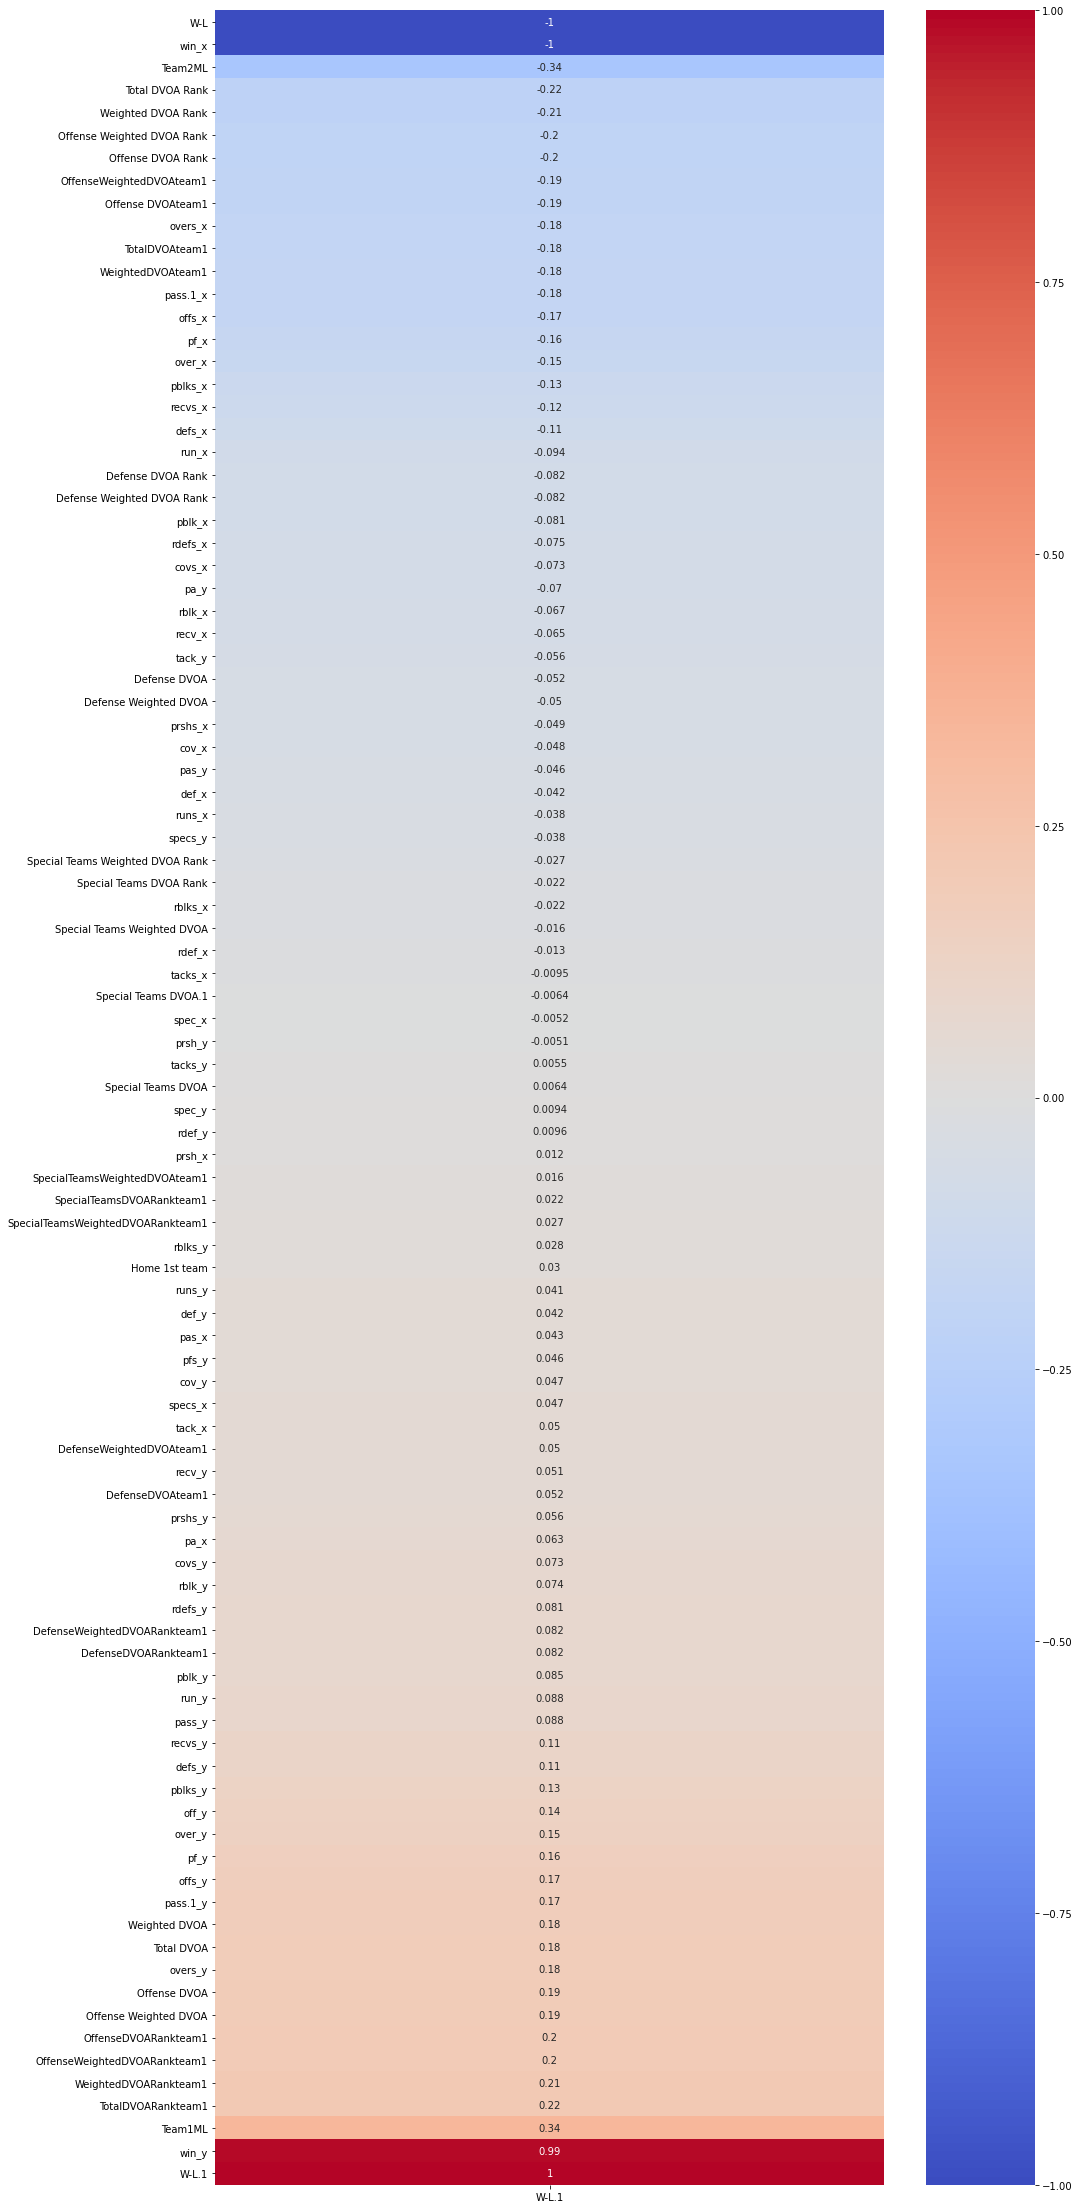

In [72]:
plt.figure(figsize=(15, 40))
sns.heatmap(dfprojected4.corr()[['W-L.1']].sort_values('W-L.1'), 
           annot=True,
           cmap='coolwarm',
           vmin=-1,
           vmax=1)

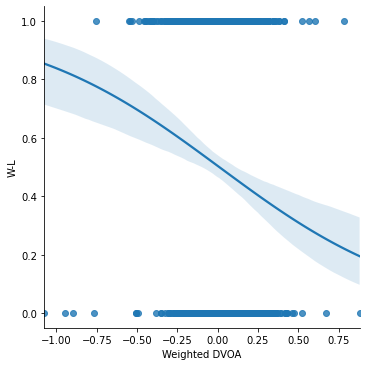

In [73]:
sns.lmplot(x="Weighted DVOA", y="W-L", logistic=True, data=dfprojected4)

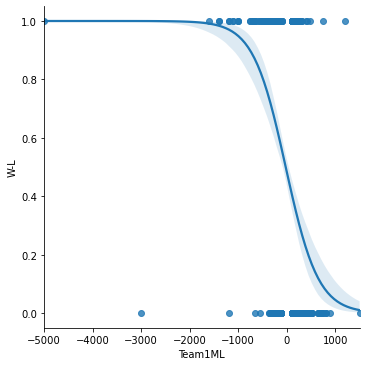

In [74]:
sns.lmplot(x="Team1ML", y="W-L", logistic=True, data=dfprojected4)

Text(0.5, 1.0, 'Odds by Team')

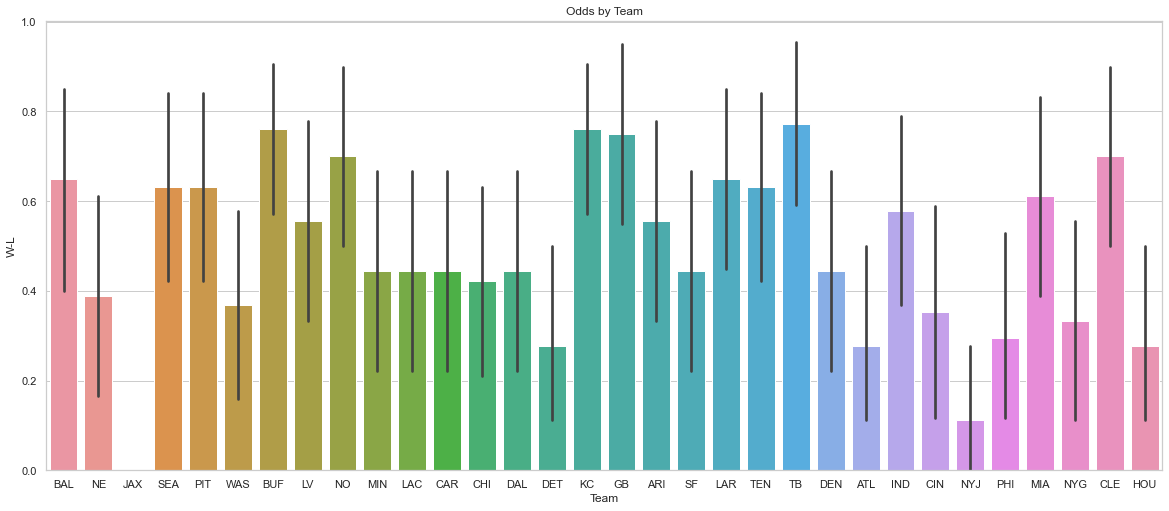

In [75]:
sns.set(rc={'figure.figsize':(20, 8.27)})
sns.set_theme(style="whitegrid")
sns.set_context("notebook")
ax = sns.barplot(x="Team", y="W-L", data=dfprojected4)
ax.set_title('Odds by Team')

Text(0.5, 1.0, 'DVOA by Team')

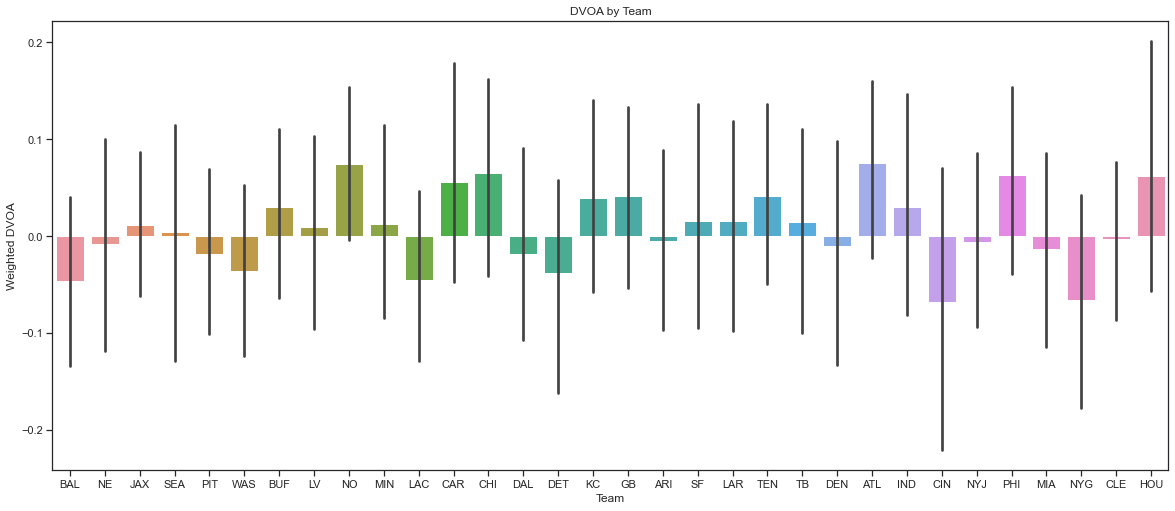

In [76]:
sns.set(rc={'figure.figsize':(20, 8.27)})
sns.set_theme(style="ticks")
sns.set_context("notebook")
ax = sns.barplot(x="Team", y="Weighted DVOA", data=dfprojected4)
ax.set_title('DVOA by Team')

Text(0.5, 1.0, 'DVOA by Odds')

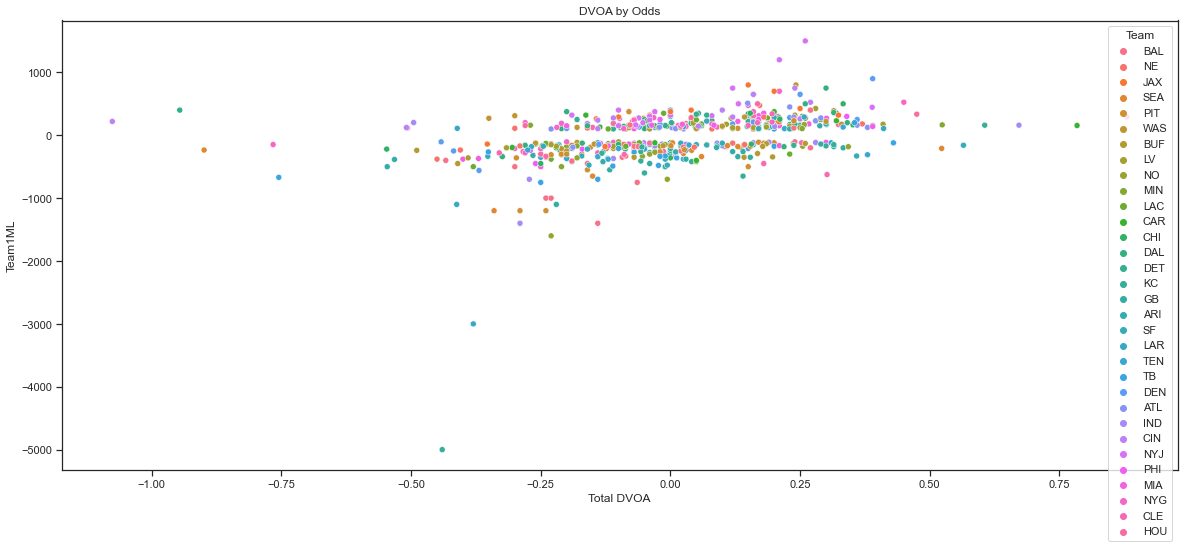

In [77]:
sns.scatterplot(data=dfprojected4, x="Total DVOA", y="Team1ML", hue="Team")
plt.title("DVOA by Odds")

Text(0.5, 1.0, 'Money Line Distribution')

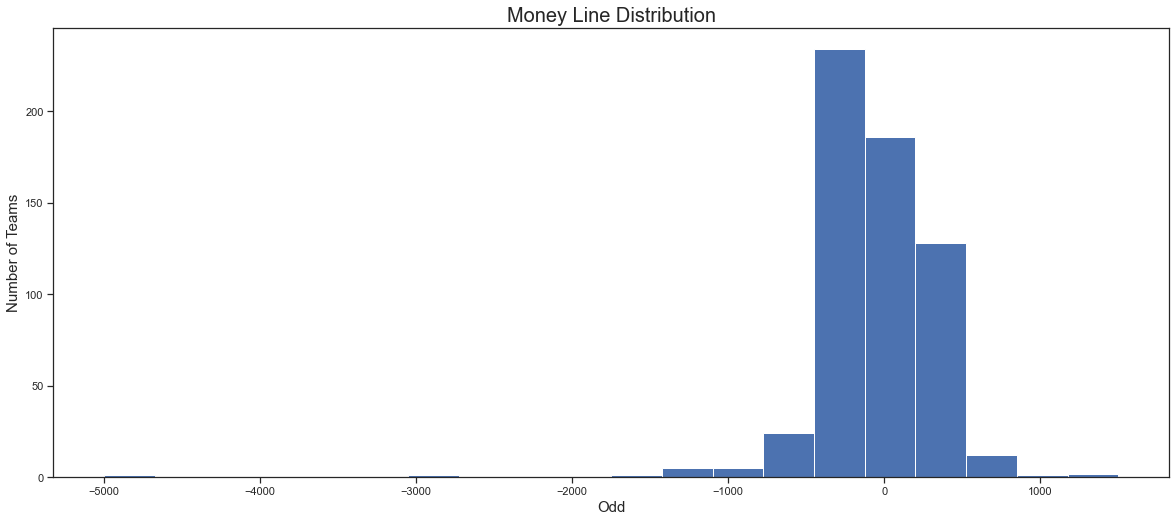

In [78]:
dfprojected4['Team1ML'].hist(bins=20,grid=False)
plt.xlabel("Odd", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Money Line Distribution", fontsize=20)

Text(0.5, 1.0, 'Money Line Distribution')

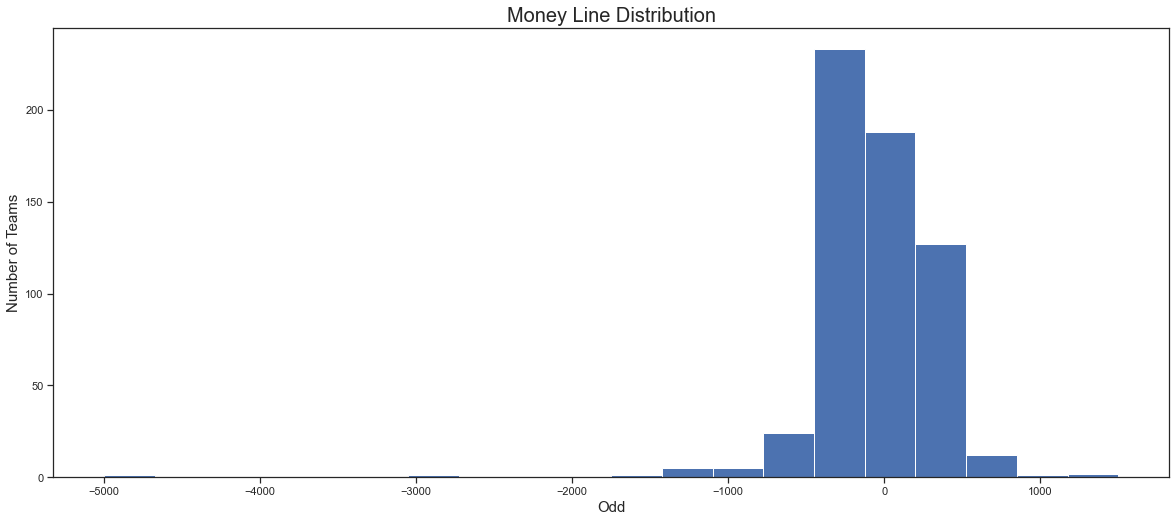

In [79]:
dfprojected4['Team2ML'].hist(bins=20,grid=False)
plt.xlabel("Odd", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Money Line Distribution", fontsize=20)

Text(0.5, 1.0, 'Offense DVOA')

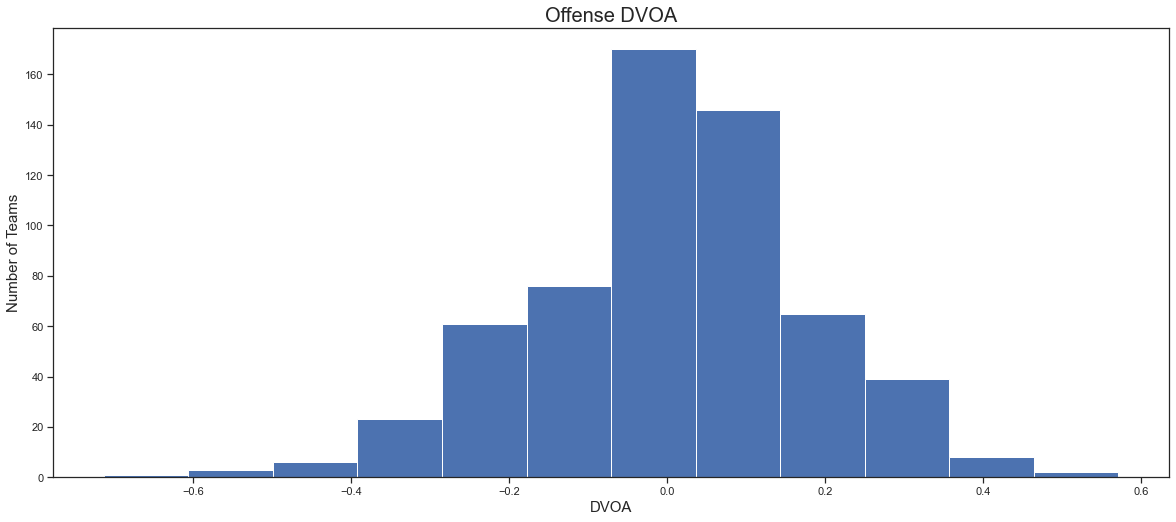

In [80]:
dfprojected4['Offense DVOA'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Offense DVOA", fontsize=20)

Text(0.5, 1.0, 'Defense DVOA')

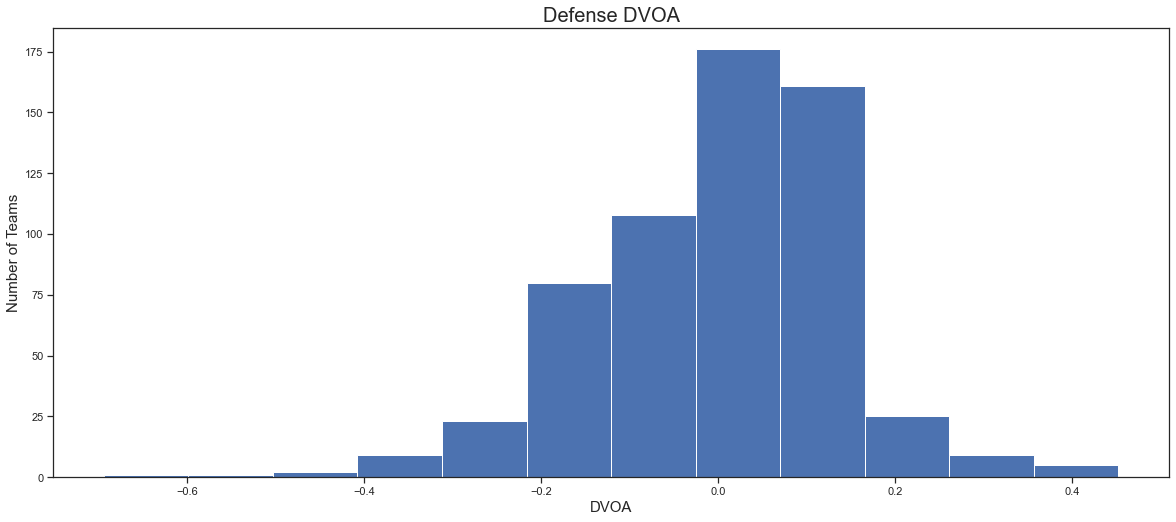

In [81]:
dfprojected4['Defense DVOA'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Defense DVOA", fontsize=20)

Text(0.5, 1.0, 'Special Teams DVOA')

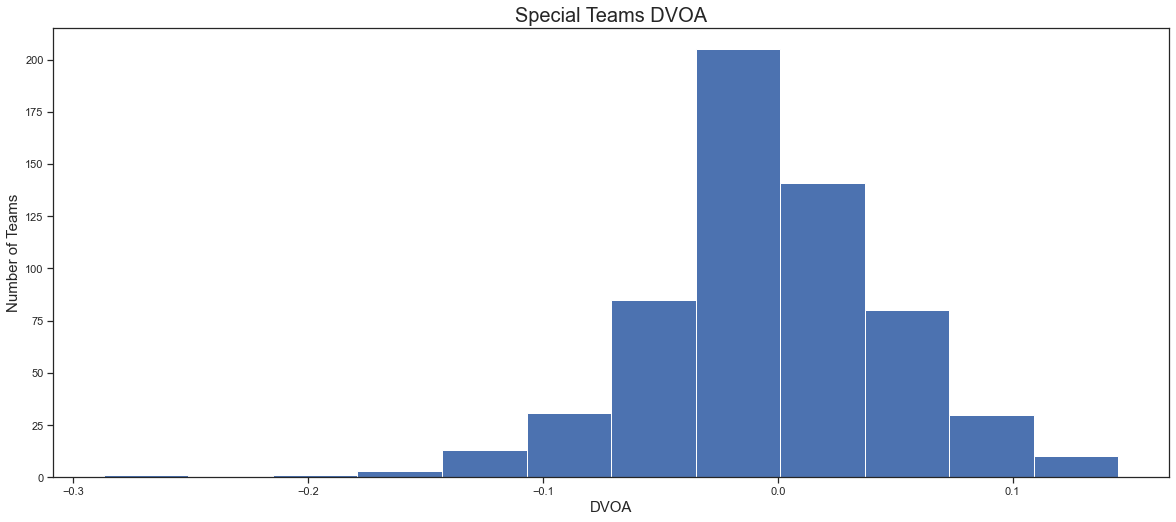

In [82]:
dfprojected4['Special Teams DVOA'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Special Teams DVOA", fontsize=20)

Text(0.5, 1.0, 'Offense Weighted DVOA')

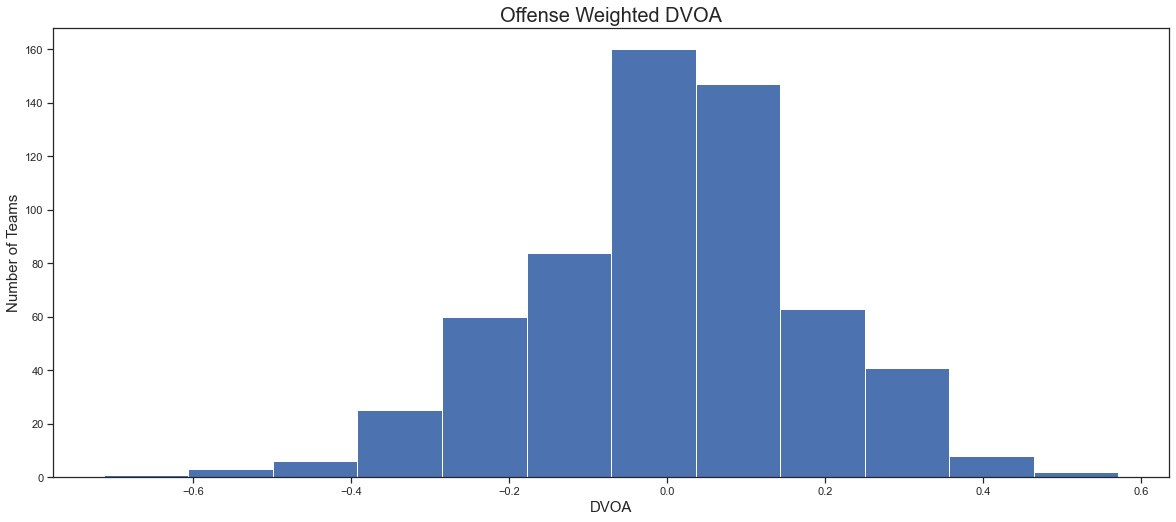

In [83]:
dfprojected4['Offense Weighted DVOA'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Offense Weighted DVOA", fontsize=20)

Text(0.5, 1.0, 'Defense Weighted DVOA')

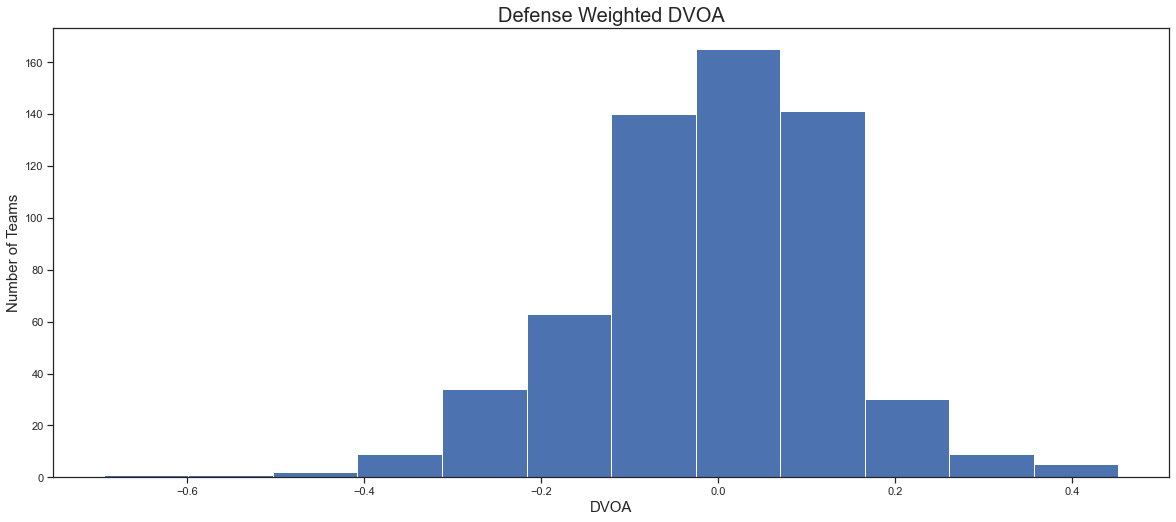

In [84]:
dfprojected4['Defense Weighted DVOA'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Defense Weighted DVOA", fontsize=20)

Text(0.5, 1.0, 'Special Teams Weighted DVOA')

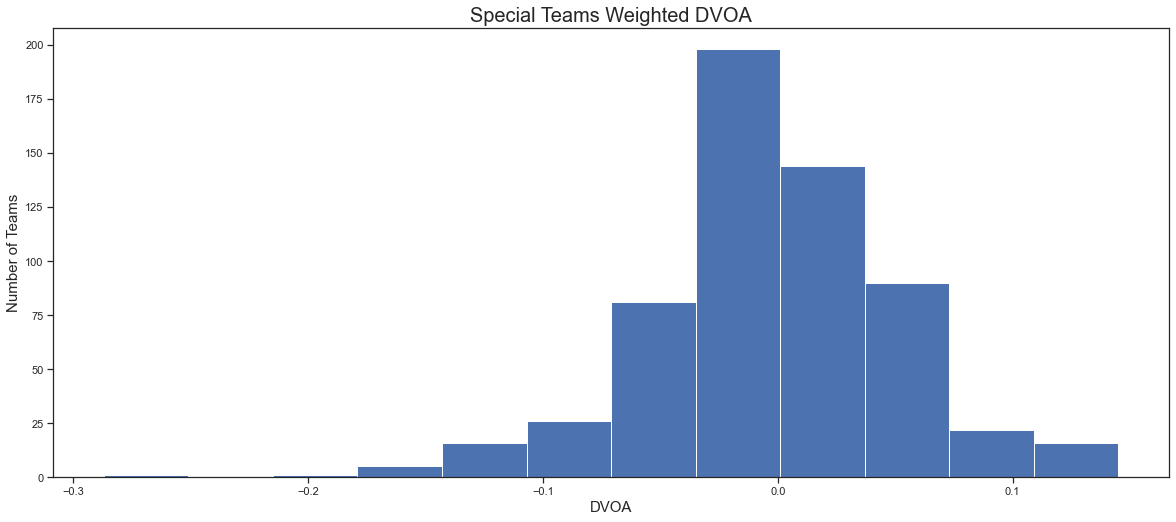

In [85]:
dfprojected4['SpecialTeamsWeightedDVOAteam1'].hist(bins=12,grid=False)
plt.xlabel("DVOA", fontsize=15)
plt.ylabel("Number of Teams",fontsize=15)
plt.title("Special Teams Weighted DVOA", fontsize=20)

In [86]:
dfprojected1.columns
dfprojected2.columns
dfprojected3.columns
dfprojected4.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1',
       ...
       'recvs_y', 'runs_y', 'rblks_y', 'defs_y', 'rdefs_y', 'tacks_y',
       'prshs_y', 'covs_y', 'specs_y', 'Team 2_y'],
      dtype='object', length=106)

In [87]:
dfprojected4['W-L'].isnull().sum()

0

In [88]:
match1.columns

Index(['Week', 'Team_x', 'win_x', 'pf_x', 'pa_x', 'over_x', 'off_x', 'pass_x',
       'pblk_x', 'recv_x', 'run_x', 'rblk_x', 'def_x', 'rdef_x', 'tack_x',
       'prsh_x', 'cov_x', 'spec_x', 'pfs_x', 'pas_x', 'overs_x', 'offs_x',
       'pass.1_x', 'pblks_x', 'recvs_x', 'runs_x', 'rblks_x', 'defs_x',
       'rdefs_x', 'tacks_x', 'prshs_x', 'covs_x', 'specs_x', 'Team 2_x',
       'Team_y', 'win_y', 'pf_y', 'pa_y', 'over_y', 'off_y', 'pass_y',
       'pblk_y', 'recv_y', 'run_y', 'rblk_y', 'def_y', 'rdef_y', 'tack_y',
       'prsh_y', 'cov_y', 'spec_y', 'pfs_y', 'pas_y', 'overs_y', 'offs_y',
       'pass.1_y', 'pblks_y', 'recvs_y', 'runs_y', 'rblks_y', 'defs_y',
       'rdefs_y', 'tacks_y', 'prshs_y', 'covs_y', 'specs_y', 'Team 2_y'],
      dtype='object')

In [89]:
#Originala Features Choice
# features=['TotalDVOAteam1', 'WeightedDVOAteam1','Offense DVOAteam1', 'OffenseWeightedDVOAteam1', 'DefenseDVOAteam1','DefenseWeightedDVOAteam1', 'Special Teams DVOA', 'SpecialTeamsWeightedDVOAteam1', 'Total DVOA',
# 'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank','Offense DVOA', 'Offense Weighted DVOA', 'Defense DVOA','Defense Weighted DVOA', 'Special Teams DVOA.1',
# 'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML']
#Modeling refinement
#features=['OffenseWeightedDVOAteam1', 'DefenseWeightedDVOAteam1', 'SpecialTeamsWeightedDVOAteam1', 'Offense Weighted DVOA', 'Defense Weighted DVOA', 'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML']
# Last without PFF 68.5 accuracy svm--below except had home team and , ]
features=['Home 1st team', 'TotalDVOARankteam1', 'Total DVOA Rank', 'OffenseWeightedDVOARankteam1', 'Offense Weighted DVOA Rank', 'Team1ML', 'Team2ML', 'Special Teams Weighted DVOA Rank', 'SpecialTeamsWeightedDVOARankteam1','DefenseDVOARankteam1', 'Defense DVOA Rank'] 

# features=['pf_x', 'pa_x', 'over_x', 'off_x', 'pass_x',
#        'pblk_x', 'recv_x', 'run_x', 'rblk_x', 'def_x', 'rdef_x', 'tack_x',
#        'prsh_x', 'cov_x', 'spec_x', 'pfs_x', 'pas_x', 'overs_x', 'offs_x',
#        'pass.1_x', 'pblks_x', 'recvs_x', 'runs_x', 'rblks_x', 'defs_x',
#        'rdefs_x', 'tacks_x', 'prshs_x', 'covs_x', 'specs_x', 'pf_y', 'pa_y', 'over_y', 'off_y', 'pass_y',
#        'pblk_y', 'recv_y', 'run_y', 'rblk_y', 'def_y', 'rdef_y', 'tack_y',
#        'prsh_y', 'cov_y', 'spec_y', 'pfs_y', 'pas_y', 'overs_y', 'offs_y',
#        'pass.1_y', 'pblks_y', 'recvs_y', 'runs_y', 'rblks_y', 'defs_y',
#         'rdefs_y', 'tacks_y', 'prshs_y', 'covs_y', 'specs_y', 'Home 1st team', 'Team1ML', 'Team2ML','TotalDVOAteam1',
#         'WeightedDVOAteam1','Offense DVOAteam1', 'OffenseWeightedDVOAteam1', 'DefenseDVOAteam1',
#           'DefenseWeightedDVOAteam1', 'Special Teams DVOA', 'SpecialTeamsWeightedDVOAteam1', 'Total DVOA',
#         'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank','Offense DVOA', 'Offense Weighted DVOA',
#           'Defense DVOA','Defense Weighted DVOA', 'Special Teams DVOA.1','Special Teams Weighted DVOA']
#66.5features=['defs_y', 'defs_x','offs_y','offs_x','pass.1_x','pass_y','overs_y', 'overs_x', 'Team1ML', 'Team2ML', 'TotalDVOARankteam1', 'Total DVOA Rank', 'OffenseWeightedDVOARankteam1', 'Offense Weighted DVOA Rank']
# 66.3lrfeatures=['defs_y', 'defs_x','offs_y','offs_x','pass_x','pass_y','overs_y', 'overs_x', 'Team1ML', 'Team2ML']
target='W-L'
SX=dfprojected4.loc[dfprojected4['Team']=='SEA']
Sy=SX['W-L']
#SX=SX.drop(columns=['W-L', 'Team', 'Team 2'])
SX=SX[features]

In [90]:
X=dfprojected3[features]
y=dfprojected3[target]
ss = StandardScaler()
X_sc=ss.fit_transform(X)

In [91]:
#instantiation
lr=LogisticRegression()
knn= KNeighborsClassifier(n_neighbors=1, weights='distance', metric='euclidean')
rf=RandomForestClassifier(n_estimators=75, n_jobs=-1)
clf = svm.SVC()
knn_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

vote = VotingClassifier([
    ('tree', RandomForestClassifier()),
    ('grad_boost', GradientBoostingClassifier()),
    ('ada_boost', AdaBoostClassifier(base_estimator=RandomForestClassifier())),
    ('knn_pipe', knn_pipe)])



In [92]:
#Cross val scores
lr_scores = cross_val_score(lr, X, y, cv=KFold(n_splits=5, shuffle=True))
knn_scores=cross_val_score(knn, X, y, cv=KFold(n_splits=5, shuffle=True))
rf_scores=cross_val_score(rf, X, y, cv=KFold(n_splits=5, shuffle=True))
svmclf_scores=cross_val_score(clf, X_sc, y, cv = 5, scoring = 'accuracy')
vote_scores=cross_val_score(vote, X, y, cv=5)
print('logreg', round (lr_scores.mean(), 3), '+-', round (2 *lr_scores.std(), 3))
print('KNN', round (knn_scores.mean(), 3), '+-', round (2 *knn_scores.std(), 3))
print('RF', round (rf_scores.mean(), 3), '+-', round (2 *rf_scores.std(), 3))
print('SVM', round (svmclf_scores.mean(), 3), '+-', round (2 *svmclf_scores.std(), 3))
print('Vote', round (vote_scores.mean(), 3), '+-', round (2*vote_scores.std(), 3))
#Sophie Tabac's lesson nlp modeling walkthrough

/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

logreg 0.653 +- 0.063
KNN 0.621 +- 0.033
RF 0.658 +- 0.055
SVM 0.68 +- 0.093
Vote 0.666 +- 0.069


In [93]:
lrpredictions= cross_val_predict(lr, X, y, cv=KFold(n_splits=10, shuffle=True))
knnpredictions= cross_val_predict(knn, X, y, cv=KFold(n_splits=10, shuffle=True))
rfpredictions= cross_val_predict(rf, X, y, cv=KFold(n_splits=10, shuffle=True))
svmclfpredictions= cross_val_predict(clf, X_sc, y, cv=KFold(n_splits=10, shuffle=True))
votepredictions=cross_val_predict(vote, X, y, cv=KFold(n_splits=10, shuffle=True))

/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [94]:
cnf_matrix_vote=metrics.confusion_matrix(y, votepredictions)
cnf_matrix_vote

array([[210,  74],
       [112, 172]])

Text(0.5, 50.92999999999999, 'Predicted label')

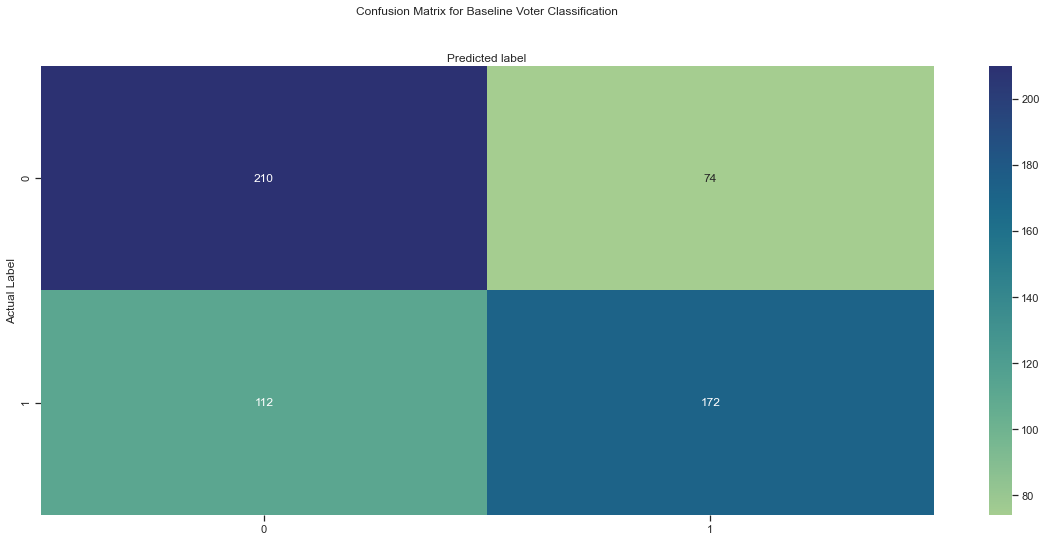

In [95]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_vote), annot=True, cmap="crest" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion Matrix for Baseline Voter Classification', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [96]:
print("Accuracy:",metrics.accuracy_score(y, votepredictions))
print("Precision:",metrics.precision_score(y, votepredictions))
print("Recall:",metrics.recall_score(y, votepredictions))
print("F1 Score:", metrics.f1_score(y, votepredictions))

Accuracy: 0.6725352112676056
Precision: 0.6991869918699187
Recall: 0.6056338028169014
F1 Score: 0.6490566037735849


In [97]:
cnf_matrix_svmclf=metrics.confusion_matrix(y, svmclfpredictions)
cnf_matrix_svmclf

array([[187,  97],
       [ 93, 191]])

Text(0.5, 50.92999999999999, 'Predicted label')

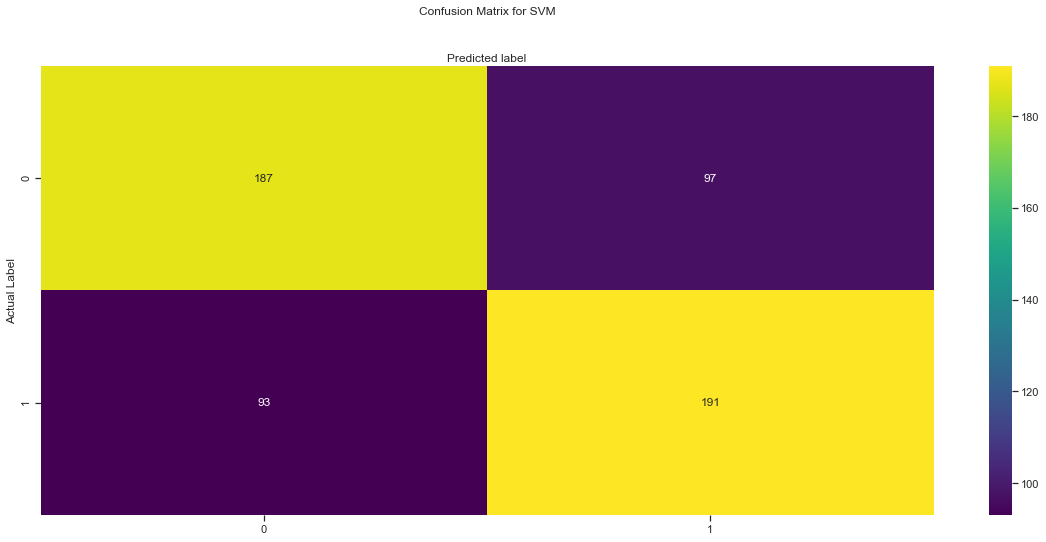

In [98]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_svmclf), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion Matrix for SVM', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [99]:
print("Accuracy:",metrics.accuracy_score(y, svmclfpredictions))
print("Precision:",metrics.precision_score(y, svmclfpredictions))
print("Recall:",metrics.recall_score(y, svmclfpredictions))
print("F1 Score:", metrics.f1_score(y, svmclfpredictions))

Accuracy: 0.6654929577464789
Precision: 0.6631944444444444
Recall: 0.6725352112676056
F1 Score: 0.6678321678321678


In [100]:
clf = svm.SVC()

gamma_range = [.01 ] #np.logspace(-5, 2, 10)
C_range = [1]  #np.logspace(-3, 2, 10)
kernel_range = ['sigmoid'] #, 'linear', 'poly''rbf']

param_grid = dict(gamma=gamma_range,  C=C_range, kernel=kernel_range)

grid1 = GridSearchCV(clf, param_grid, cv = 5,
                    scoring = 'accuracy', verbose = 1, n_jobs = -1)

grid1.fit(X_sc, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.01], 'kernel': ['sigmoid']},
             scoring='accuracy', verbose=1)

In [101]:
# check the results

print(grid1.best_params_)
print(grid1.best_score_)
gssvmpredictions= cross_val_predict(grid1, X, y, cv=KFold(n_splits=10, shuffle=True))

#gssvmpredictions=grid1.predict(X_sc)

{'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.6671790094705792
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [102]:
cnf_matrix_gssvm=metrics.confusion_matrix(y, gssvmpredictions)
cnf_matrix_gssvm
#Riley Dallas's Classification MetricII lecture

array([[189,  95],
       [ 91, 193]])

Text(0.5, 50.92999999999999, 'Predicted label')

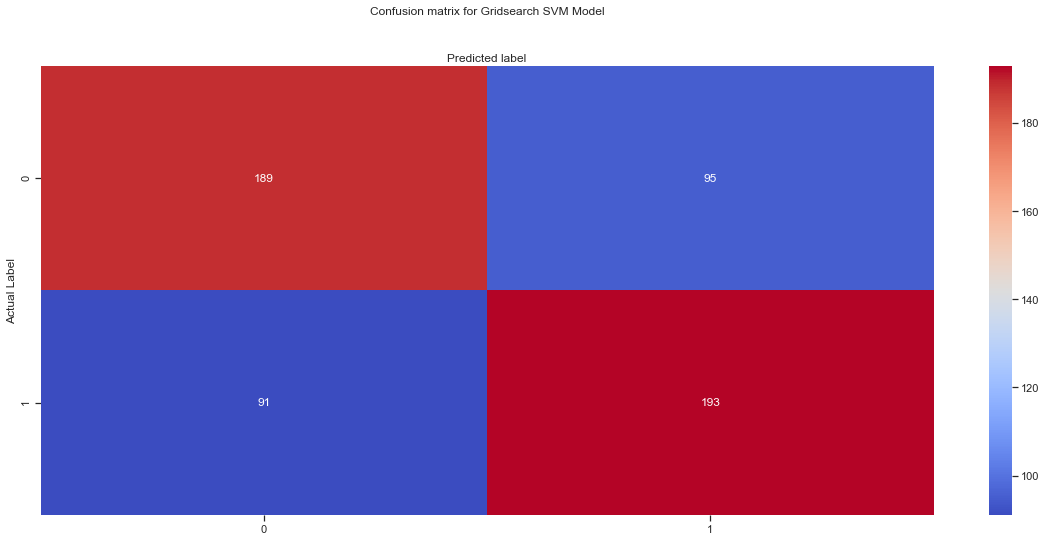

In [103]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_gssvm), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for Gridsearch SVM Model', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [104]:
print("Accuracy:",metrics.accuracy_score(y, gssvmpredictions))
print("Precision:",metrics.precision_score(y, gssvmpredictions))
print("Recall:",metrics.recall_score(y, gssvmpredictions))
print("F1 Score:", metrics.f1_score(y, gssvmpredictions))

Accuracy: 0.6725352112676056
Precision: 0.6701388888888888
Recall: 0.6795774647887324
F1 Score: 0.6748251748251748


In [105]:
params = {
    'ada_boost__base_estimator__max_depth': [1],
    'grad_boost__n_estimators': [75],
    'knn_pipe__knn__n_neighbors': [6],
    'weights': [[.3, .3, .2, .2]]
}
gsadagr = GridSearchCV(vote, param_grid=params)
gsadagr.fit(X, y)
print(gsadagr.best_score_)
gsadagr.best_params_
#Initial run best results
# params = {
#     'ada_boost__base_estimator__max_depth': [1, 2],
#     'grad_boost__n_estimators': [50, 75],
#     'knn_pipe__knn__n_neighbors': [5, 6],
#     'weights': [[.25, .25, .25, .25], [.3, .3, .2, .2]]
#Best results from initial one
# 1,
# 50,
# 6,
# 0.3, 0.3, 0.2, 0.2]}
#With PFF only .6566 score
#1,2-50,75-5,6-.25x4.-.3.3.2.2
#1, 75, 6, .3.3.2.2 had higher score

0.6532526005278684


{'ada_boost__base_estimator__max_depth': 1,
 'grad_boost__n_estimators': 75,
 'knn_pipe__knn__n_neighbors': 6,
 'weights': [0.3, 0.3, 0.2, 0.2]}

In [106]:
gsadagrpredictions1= cross_val_predict(gsadagr, X, y, cv=KFold(n_splits=10, shuffle=True))

#gsadagrpredictions1=gsadagr.predict(X)

In [107]:
cnf_matrix_gsadagr=metrics.confusion_matrix(y, gsadagrpredictions1)
cnf_matrix_gsadagr
#Riley Dallas's Classification MetricII lecture

array([[211,  73],
       [117, 167]])

Text(0.5, 527.9871999999999, 'Predicted')

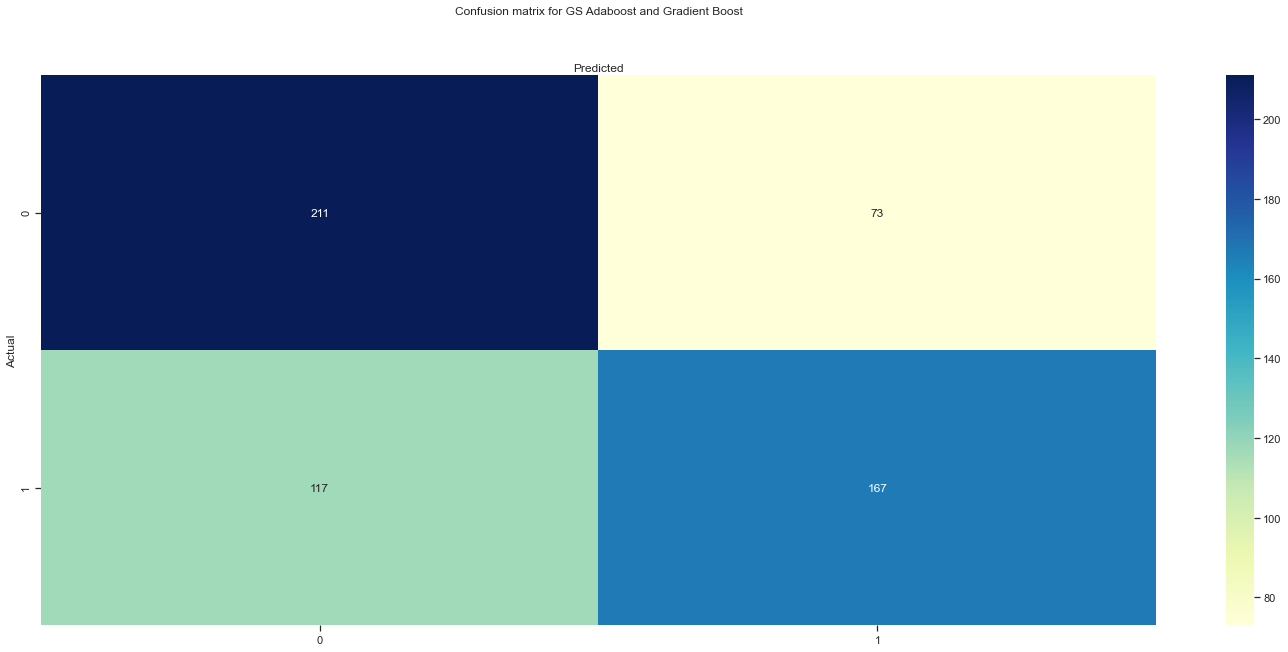

In [108]:
cnf_matrix_gsadagr=metrics.confusion_matrix(y, gsadagrpredictions1)
cnf_matrix_gsadagr
#Riley Dallas's Classification MetricII lecture
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_gsadagr), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for GS Adaboost and Gradient Boost', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [109]:
print("Accuracy:",metrics.accuracy_score(y, gsadagrpredictions1))
print("Precision:",metrics.precision_score(y, gsadagrpredictions1))
print("Recall:",metrics.recall_score(y, gsadagrpredictions1))
print("F1 Score:", metrics.f1_score(y, gsadagrpredictions1))

Accuracy: 0.6654929577464789
Precision: 0.6958333333333333
Recall: 0.5880281690140845
F1 Score: 0.6374045801526717


In [110]:
cnf_matrix_lr=metrics.confusion_matrix(y, lrpredictions)
cnf_matrix_lr
#Riley Dallas's Classification MetricII lecture

array([[194,  90],
       [ 91, 193]])

Text(0.5, 50.92999999999999, 'Predicted label')

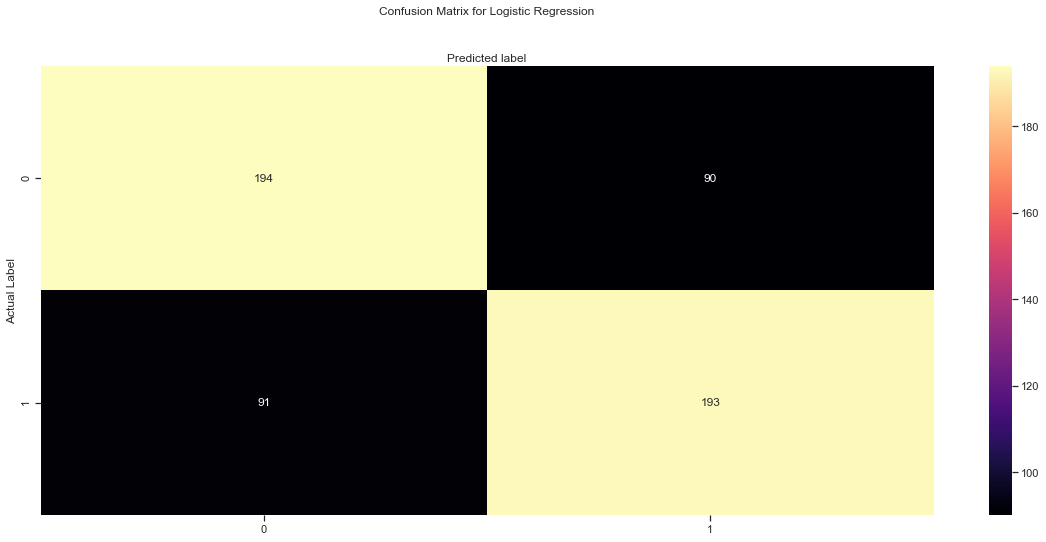

In [111]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lr), annot=True, cmap="magma" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [112]:
print("Accuracy:",metrics.accuracy_score(y, lrpredictions))
print("Precision:",metrics.precision_score(y, lrpredictions))
print("Recall:",metrics.recall_score(y, lrpredictions))
print("F1 Score:", metrics.f1_score(y, lrpredictions))

Accuracy: 0.6813380281690141
Precision: 0.6819787985865724
Recall: 0.6795774647887324
F1 Score: 0.6807760141093474


In [113]:
cnf_matrix_knn=metrics.confusion_matrix(y, knnpredictions)
cnf_matrix_knn
#Riley Dallas's Classification MetricII lecture

array([[177, 107],
       [109, 175]])

Text(0.5, 50.92999999999999, 'Predicted label')

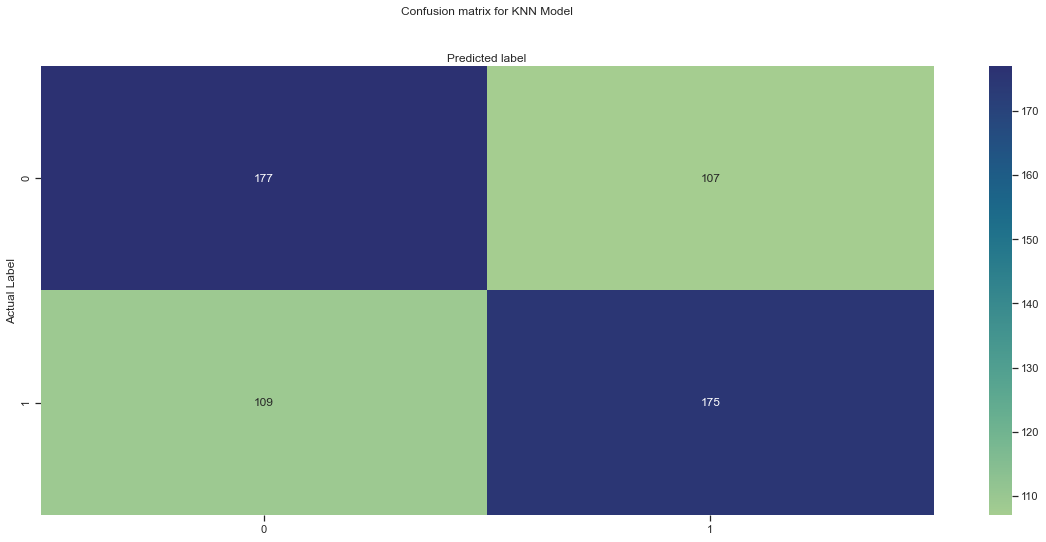

In [114]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="crest" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for KNN Model', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
#Riley Dallas's Classification MetricII lecture

In [115]:
print("Accuracy:",metrics.accuracy_score(y, knnpredictions))
print("Precision:",metrics.precision_score(y, knnpredictions))
print("Recall:",metrics.recall_score(y, knnpredictions))
print("F1 Score:", metrics.f1_score(y, knnpredictions))

Accuracy: 0.6197183098591549
Precision: 0.6205673758865248
Recall: 0.6161971830985915
F1 Score: 0.6183745583038869


In [116]:
cnf_matrix_rf=metrics.confusion_matrix(y, rfpredictions)
cnf_matrix_rf
#Riley Dallas's Classification MetricII lecture

array([[190,  94],
       [ 93, 191]])

Text(0.5, 527.9871999999999, 'Predicted')

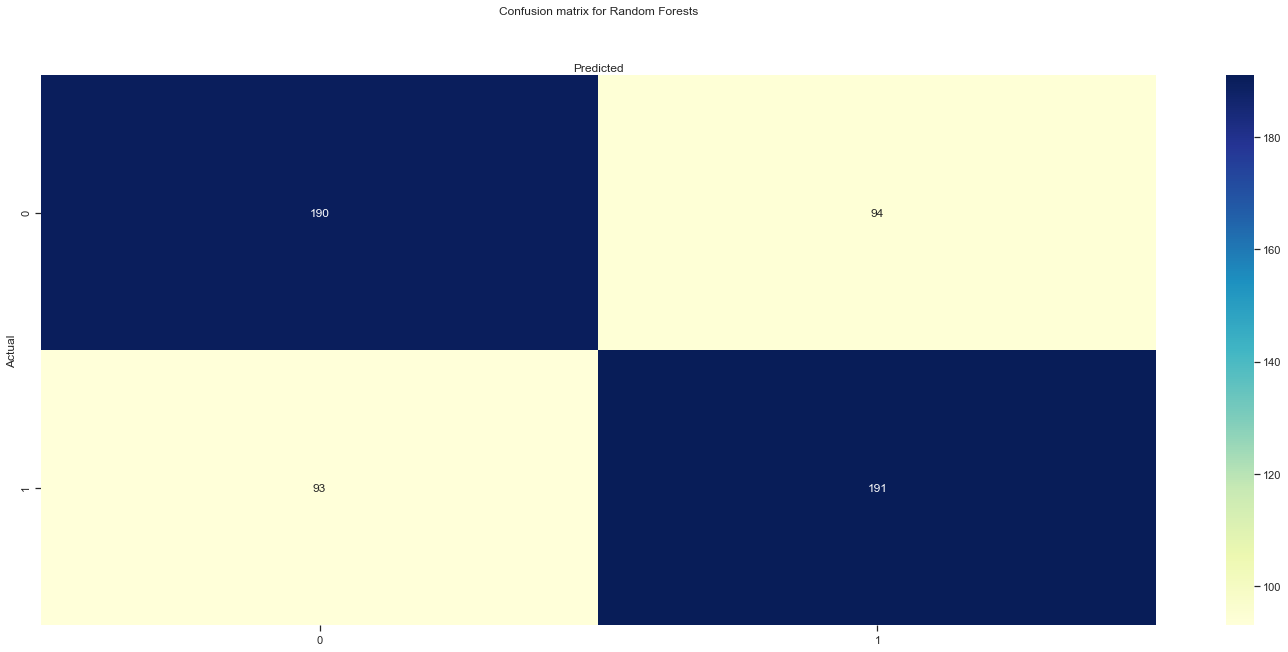

In [117]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Random Forests', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [118]:
print("Accuracy:",metrics.accuracy_score(y, rfpredictions))
print("Precision:",metrics.precision_score(y, rfpredictions))
print("Recall:",metrics.recall_score(y, rfpredictions))
print("F1 Score:", metrics.f1_score(y, rfpredictions))

Accuracy: 0.670774647887324
Precision: 0.6701754385964912
Recall: 0.6725352112676056
F1 Score: 0.671353251318102


In [119]:
paramsrf = {
    'max_depth': [7],
    'min_samples_split': [2],
    'min_samples_leaf': [6],
    'ccp_alpha': [0.001]
}
#  This was what was initally tried. 
#param_grid={'ccp_alpha': [0, 0.001, 0.01, 0.1, 1],
#                          'max_depth': [2, 3, 5, 7],
#                          'min_samples_leaf': [2, 3, 4, 5, 6],
#                          'min_samples_split': [5, 10, 15, 20]})
#the best params for this was .0001, 7, 6,5 up to down is right to left

# 2nd run had these:
#     paramsrf = {
#     'max_depth': [6,7,8],
#     'min_samples_split': [4,5,6],
#     'min_samples_leaf': [6,7,8],
#     'ccp_alpha': [0.001]
        
# Results were as follows:
# {'ccp_alpha': 0.001,
#  'max_depth': 7,
#  'min_samples_leaf': 6,
#  'min_samples_split': 4}        

In [120]:
# Let's GridSearch over the above parameters on our training data.
gridrf = GridSearchCV(RandomForestClassifier(random_state=42),
                   param_grid=paramsrf)
gridrf.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.001], 'max_depth': [7],
                         'min_samples_leaf': [6], 'min_samples_split': [2]})

In [121]:
print(gridrf.best_score_)
gridrf.best_params_

0.6496040987424314


{'ccp_alpha': 0.001,
 'max_depth': 7,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [122]:
gridrfpredictions1= cross_val_predict(gridrf, X, y, cv=KFold(n_splits=10, shuffle=True))

#gridrfpredictions1=gridrf.predict(X)
cnf_matrix_gridrf=metrics.confusion_matrix(y, gridrfpredictions1)
cnf_matrix_gridrf
#Riley Dallas's Classification MetricII lecture

array([[185,  99],
       [ 95, 189]])

Text(0.5, 50.92999999999999, 'Predicted')

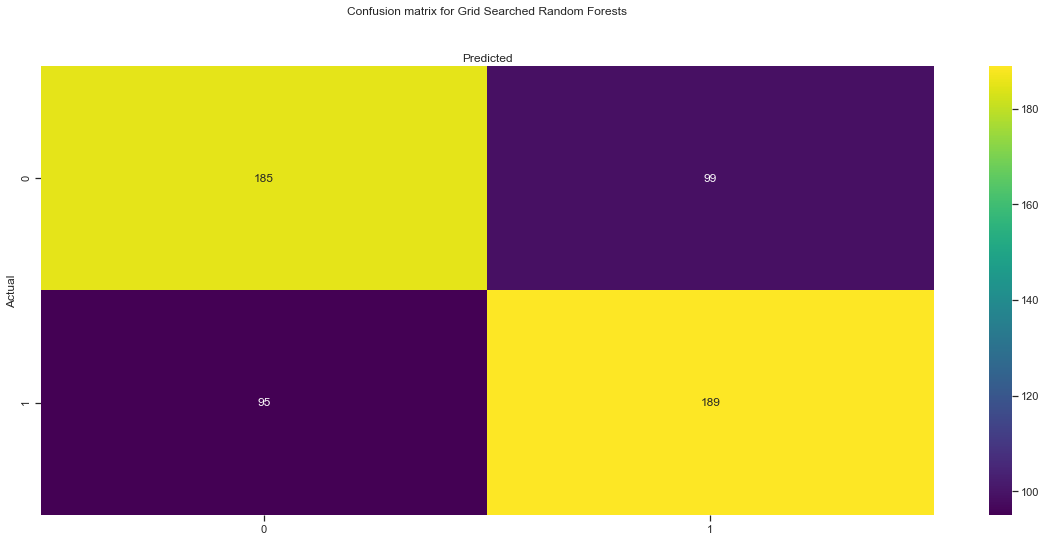

In [123]:
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_gridrf), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for Grid Searched Random Forests', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [124]:
print("Accuracy:",metrics.accuracy_score(y, gridrfpredictions1))
print("Precision:",metrics.precision_score(y, gridrfpredictions1))
print("Recall:",metrics.recall_score(y, gridrfpredictions1))
print("F1 Score:", metrics.f1_score(y, gridrfpredictions1))

Accuracy: 0.6584507042253521
Precision: 0.65625
Recall: 0.6654929577464789
F1 Score: 0.6608391608391607


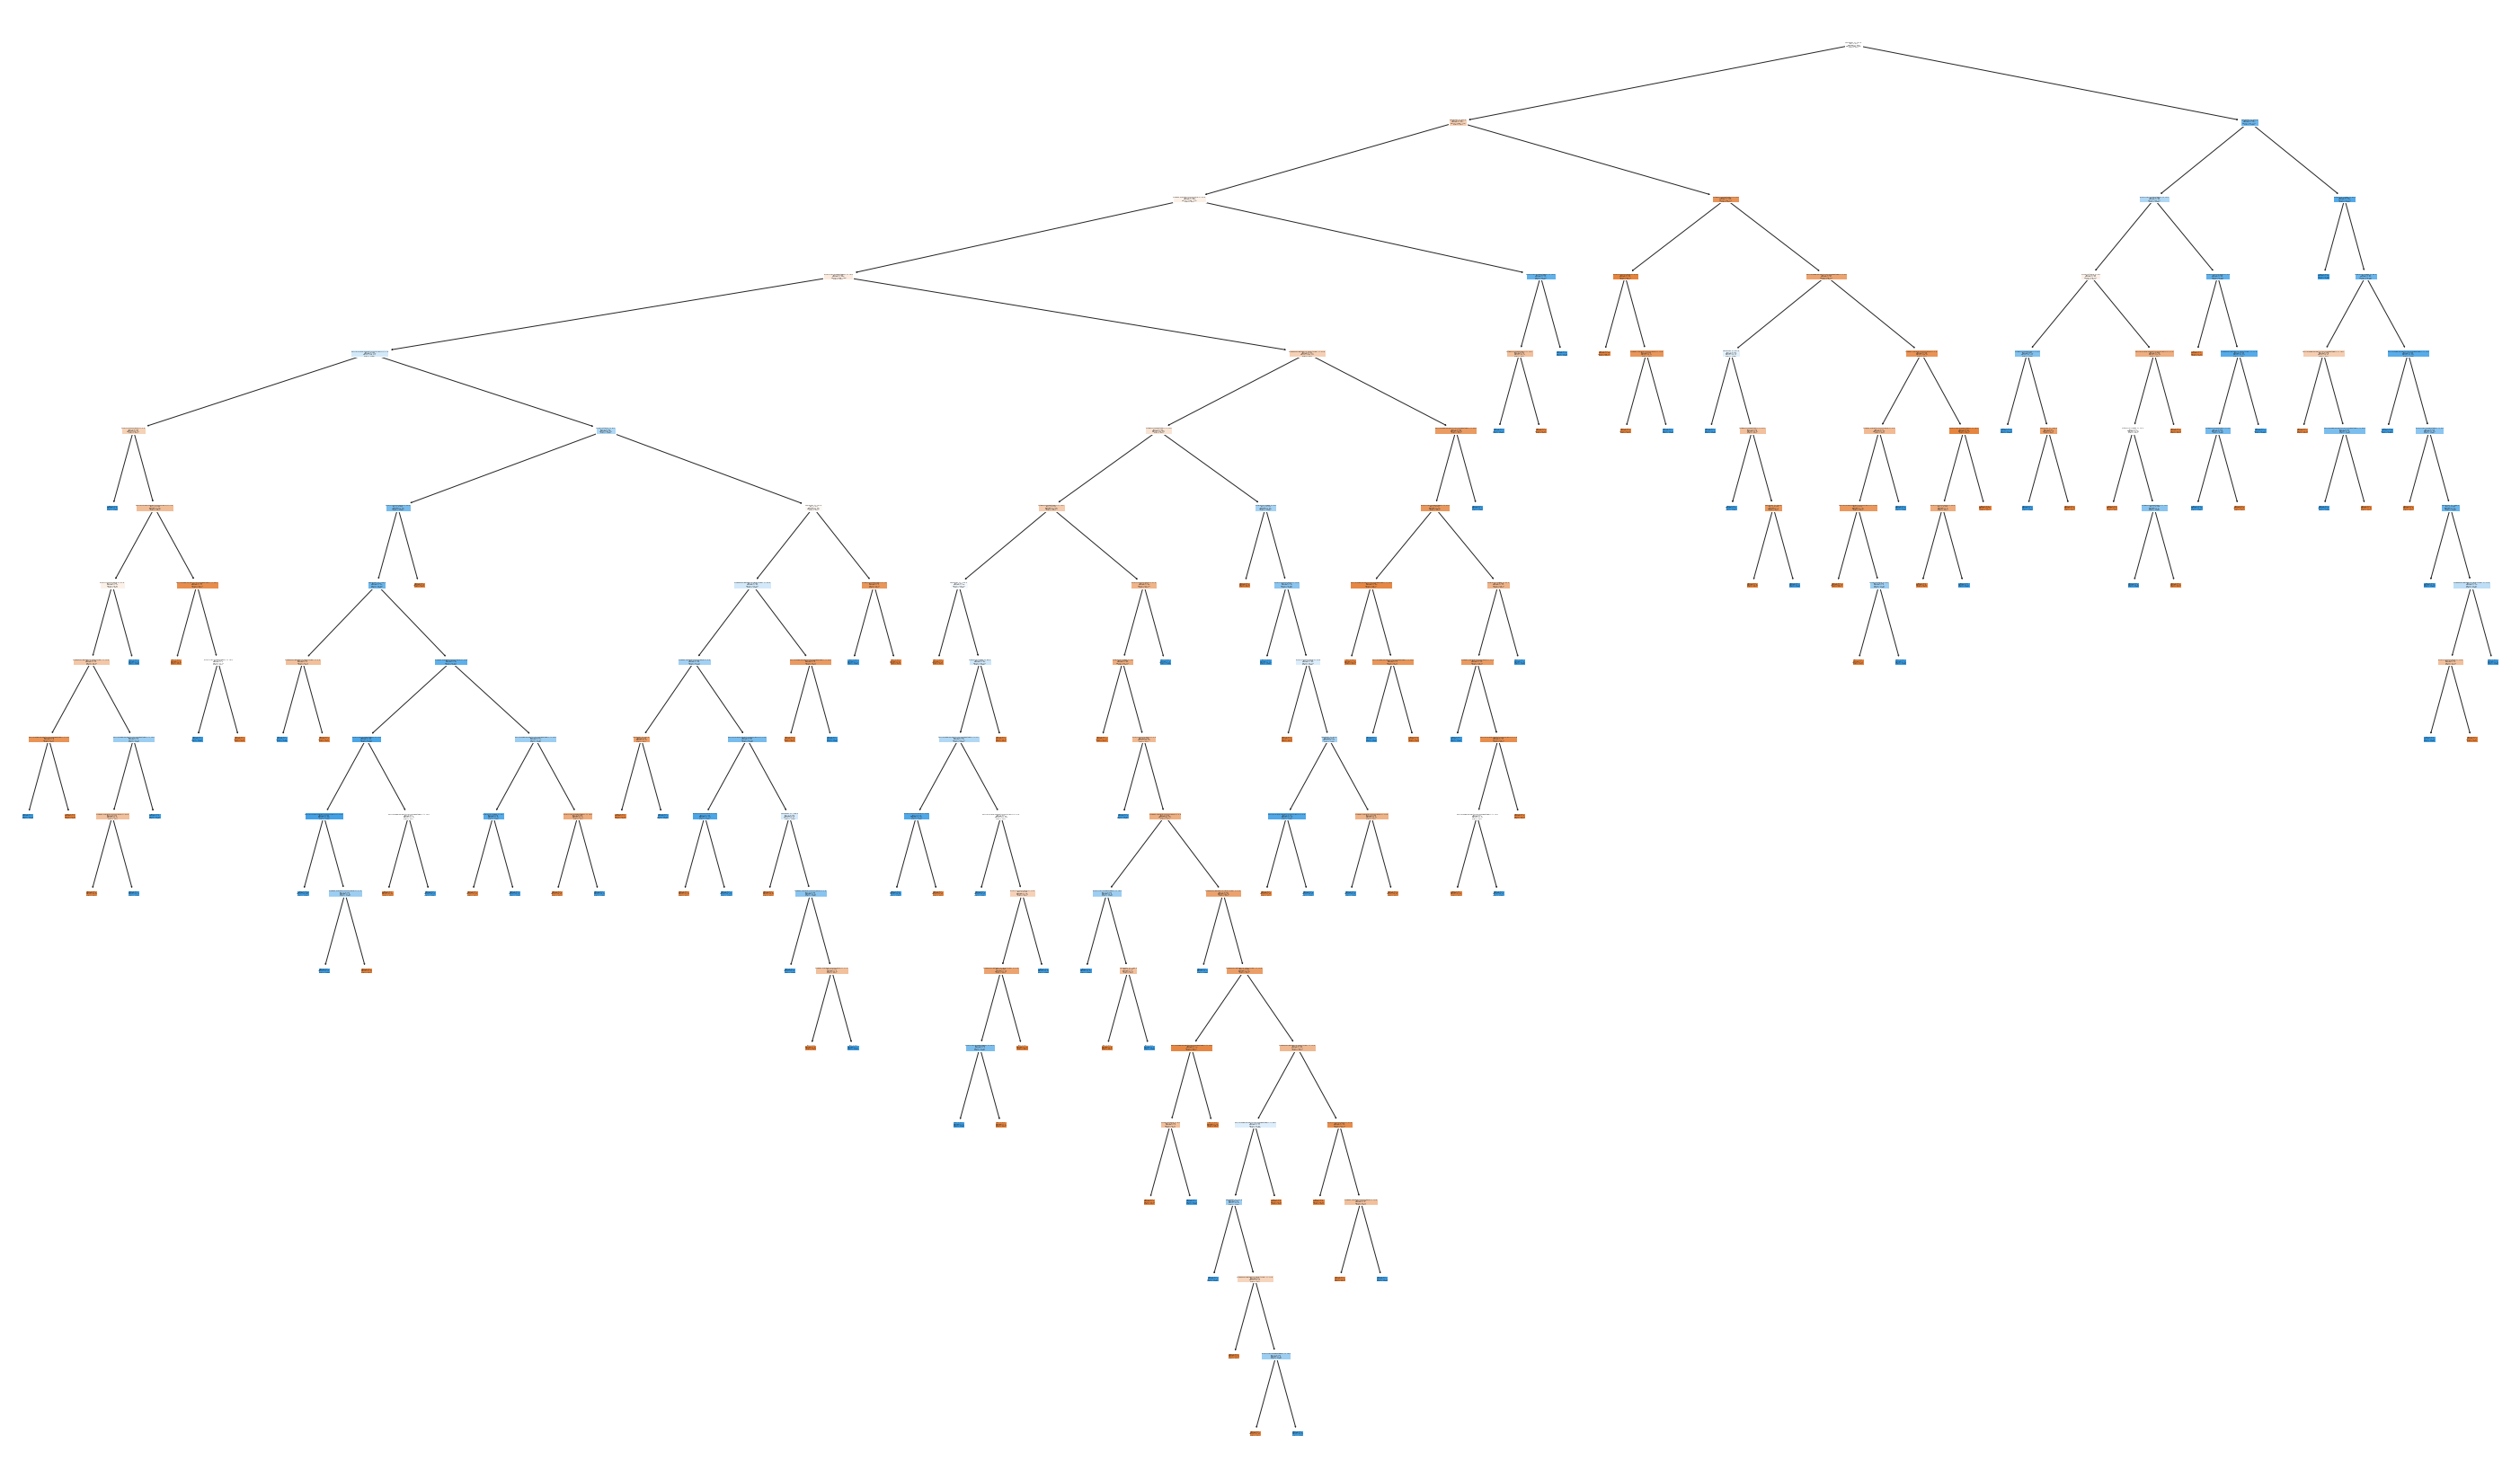

In [125]:
dc = tree.DecisionTreeClassifier()
dc.fit(X, y)

# Establish size of figure.
plt.figure(figsize = (50, 30))

# Plot our tree.
tree.plot_tree(dc,
          feature_names = X.columns,
          class_names = ['Win', 'Lose'],
          filled = True);

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=33, shuffle=True)

In [127]:
X.shape

(568, 11)

In [128]:
ss = StandardScaler()
X_sc=ss.fit_transform(X)
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [129]:
def model_fn(layer_one_neurons=32, d_drop1=.1,layer_two_neurons=32):
    model = Sequential()
    model.add(Dense(layer_one_neurons, activation='relu', input_shape=(11,)))
    model.add(Dropout(d_drop1))
    model.add(Dense(layer_two_neurons, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    return model

nn = KerasRegressor(build_fn=model_fn, batch_size=512, verbose=0)

params={'epochs':[100],
        'layer_one_neurons':[32],
       'layer_two_neurons':[32],
       'd_drop1': [.25]}
gs = GridSearchCV(nn, param_grid=params, cv=5)
resgs=gs.fit(X_sc, y)
print(gs.best_score_)
gs.best_params_




-0.6617378830909729


{'d_drop1': 0.25,
 'epochs': 100,
 'layer_one_neurons': 32,
 'layer_two_neurons': 32}

In [130]:
gspredictions1= cross_val_predict(gs, X_sc, y, cv=KFold(n_splits=10, shuffle=True))
gspredictions1=np.round(gspredictions1)
#gspredictions1=np.round(gs.predict(X_sc))

Text(0.5, 50.92999999999999, 'Predicted')

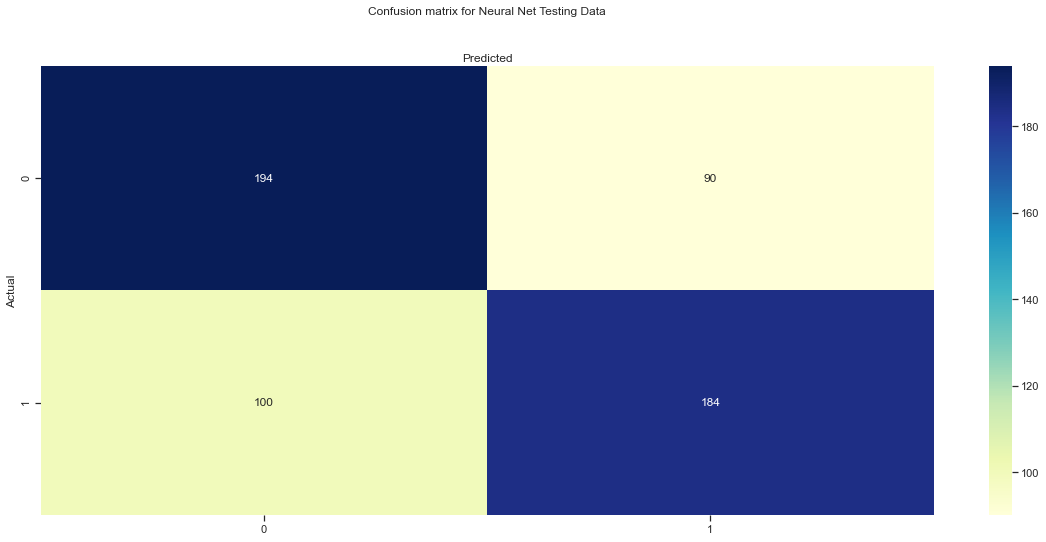

In [131]:
cnf_matrix_nn_gs=metrics.confusion_matrix(y, gspredictions1)
cnf_matrix_nn_gs
#Riley Dallas's Classification MetricII lecture
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn_gs), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for Neural Net Testing Data', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [132]:
print("Accuracy:",metrics.accuracy_score(y, gspredictions1))
print("Precision:",metrics.precision_score(y, gspredictions1))
print("Recall:",metrics.recall_score(y, gspredictions1))
print("F1 Score:", metrics.f1_score(y, gspredictions1))

Accuracy: 0.6654929577464789
Precision: 0.6715328467153284
Recall: 0.647887323943662
F1 Score: 0.6594982078853046


In [133]:
modelo = Sequential()
modelo.add(Dense(20,activation='relu',
                input_shape=(11,)))
modelo.add(Dense(19,activation='relu',
                input_shape=(11,)))
#model will predict probability betwee .0 to 1
#1 neuron, sigmoid turns into probability
modelo.add(Dense(1, activation='sigmoid'))
# with accuracy as a metric
modelo.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # optional param, great for classification# with accuracy as a metric


In [134]:
reso= modelo.fit(X_train, y_train, epochs=100,
              batch_size=512,
              validation_data=(X_test_sc, y_test),
              verbose=0)#0 means don't print

In [135]:
reso.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

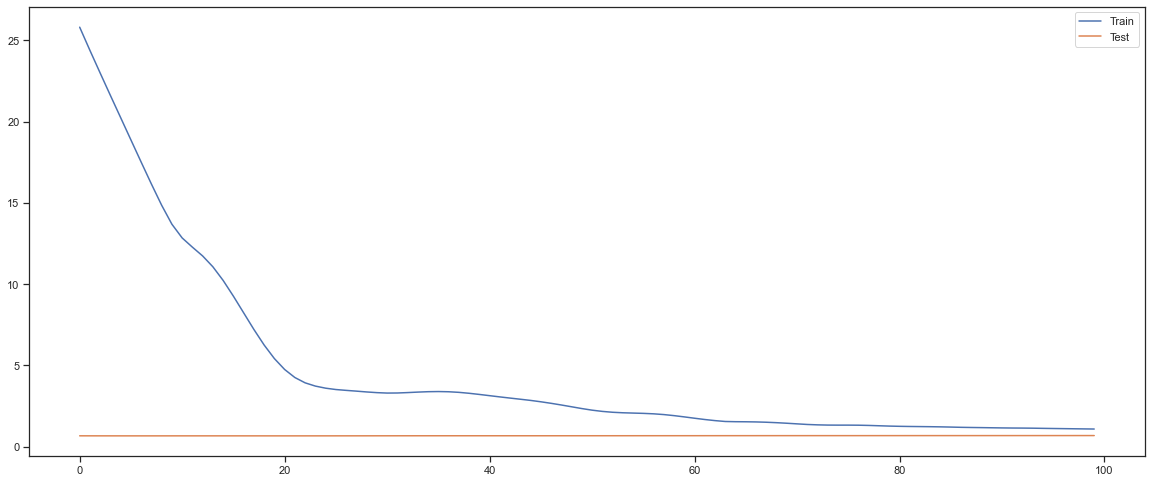

In [136]:
plt.plot(reso.history['loss'], label='Train')
plt.plot(reso.history['val_loss'], label='Test')
plt.legend();

In [137]:
nnpredictions_train= modelo.predict(X_train_sc)
nnpredictions_train=np.round(nnpredictions_train)


Text(0.5, 50.92999999999999, 'Predicted')

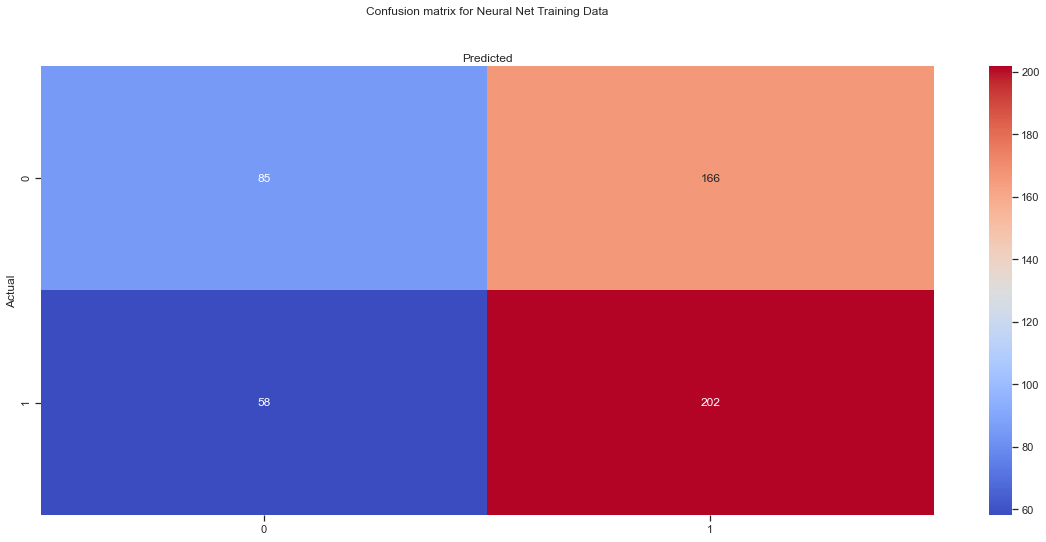

In [138]:
cnf_matrix_nn_train=metrics.confusion_matrix(y_train, nnpredictions_train)
cnf_matrix_nn_train
#Riley Dallas's Classification MetricII lecture
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn_train), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for Neural Net Training Data', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [139]:
print("Accuracy:",metrics.accuracy_score(y_train, nnpredictions_train))
print("Precision:",metrics.precision_score(y_train, nnpredictions_train))
print("Recall:",metrics.recall_score(y_train, nnpredictions_train))
print("F1 Score:", metrics.f1_score(y_train, nnpredictions_train))

Accuracy: 0.5616438356164384
Precision: 0.5489130434782609
Recall: 0.7769230769230769
F1 Score: 0.6433121019108281


In [140]:
nnpredictions_test= modelo.predict(X_test)
nnpredictions_test=np.round(nnpredictions_test)

Text(0.5, 50.92999999999999, 'Predicted')

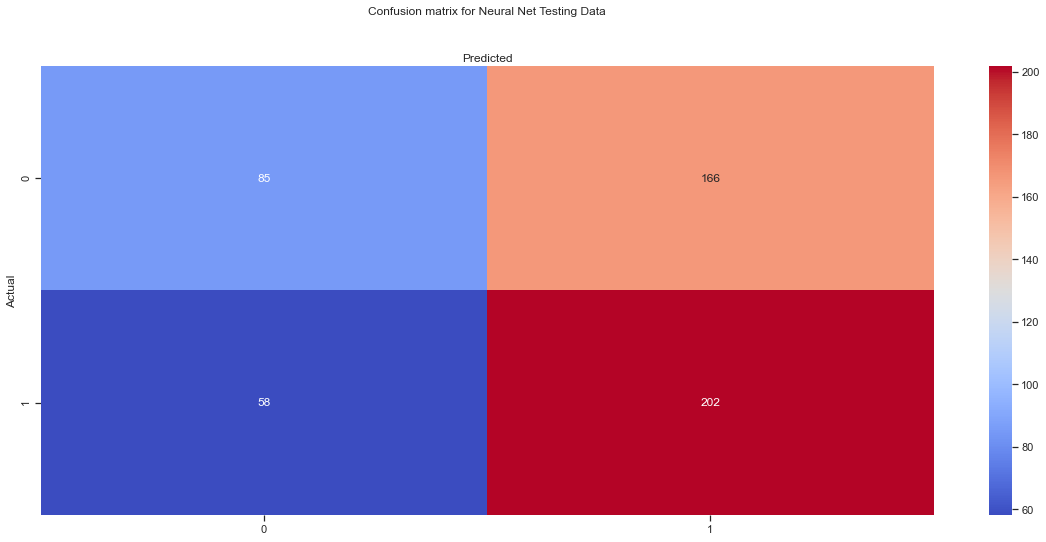

In [141]:

cnf_matrix_nn_test=metrics.confusion_matrix(y_test, nnpredictions_test)
cnf_matrix_nn_test
#Riley Dallas's Classification MetricII lecture
# name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(y))
plt.xticks(tick_marks, y)
plt.yticks(tick_marks, y)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_nn_train), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix for Neural Net Testing Data', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
#Riley Dallas's Classification MetricII lecture

In [142]:
print("Accuracy:",metrics.accuracy_score(y_test, nnpredictions_test))
print("Precision:",metrics.precision_score(y_test, nnpredictions_test))
print("Recall:",metrics.recall_score(y_test, nnpredictions_test))
print("F1 Score:", metrics.f1_score(y_test, nnpredictions_test))

Accuracy: 0.6842105263157895
Precision: 0.6071428571428571
Recall: 0.7083333333333334
F1 Score: 0.6538461538461539


In [143]:
dftest2021WK1= pd.read_csv('./Data/2021_Week1.test.2020endinputs.csv')

In [144]:
dftest2021WK2=pd.read_csv('./Data/2021_Team_DVOA_Ratings_Overall_after_Week_1test.csv')

In [145]:
dftest2021WK3=pd.read_csv('./Data/2021_Team_DVOA_Ratings_Overall_after_Week_2_convert.csv')

In [146]:

dftest2021WK2=dftest2021WK2.rename(columns={'1st_Team_ML':'Team1ML', '2nd_Team_ML':'Team2ML'})
dftest2021WK2.columns
dftest2021WK3.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML'],
      dtype='object')

In [ ]:
#dftest2021

In [147]:
# features=['TotalDVOAteam1', 'WeightedDVOAteam1','Offense DVOAteam1', 'OffenseWeightedDVOAteam1', 'DefenseDVOAteam1',
# 'DefenseWeightedDVOAteam1', 'Special Teams DVOA', 'SpecialTeamsWeightedDVOAteam1', 'Total DVOA',
# 'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
# 'Offense DVOA', 'Offense Weighted DVOA', 'Defense DVOA',
# 'Defense Weighted DVOA', 'Special Teams DVOA.1',
# 'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML']

#features=['OffenseWeightedDVOAteam1', 'DefenseWeightedDVOAteam1', 'SpecialTeamsWeightedDVOAteam1', 'Offense Weighted DVOA', 'Defense Weighted DVOA', 'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML']
features=['Home 1st team', 'TotalDVOARankteam1', 'Total DVOA Rank', 'OffenseWeightedDVOARankteam1', 'Offense Weighted DVOA Rank', 'Team1ML', 'Team2ML', 'Special Teams Weighted DVOA Rank', 'SpecialTeamsWeightedDVOARankteam1','DefenseDVOARankteam1', 'Defense DVOA Rank'] 

target='W-L'

Xvalidation1=df21t0c[features]
Xvalidation2=dftest2021WK2[features]
Xvalidation3=dftest2021WK3[features]
Xvalidation4=dftest2021WK4[features]
#No y as the first of NFL starts-predictions made prior to games

In [148]:
# grid.fit(X_sc, y)
lr.fit(X, y)
knn.fit(X,y)
rf.fit(X,y) 
ss = StandardScaler()
Xvalidation4_sc = ss.fit_transform(Xvalidation4)
Xvalidation3_sc = ss.fit_transform(Xvalidation3)
Xvalidation2_sc = ss.fit_transform(Xvalidation2)
Xvalidation1_sc = ss.fit_transform(Xvalidation1)

/Users/vivekbavda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [149]:
gsadagrpred1=gsadagr.predict(Xvalidation4)
lrpred1 = lr.predict(Xvalidation4)
knnpred1 = knn.predict(Xvalidation4)
rfpred1 = rf.predict(Xvalidation4)
nnpred1= modelo.predict(Xvalidation4_sc)
gnnpred1= gs.predict(Xvalidation4_sc)
gssvmpredictions=grid1.predict(Xvalidation4_sc)
grrfpred1=gridrf.predict(Xvalidation4)


In [150]:
dftest2021WK4.columns

Index(['Team', 'W-L', 'TotalDVOARankteam1', 'TotalDVOAteam1',
       'WeightedDVOARankteam1', 'WeightedDVOAteam1', 'OffenseDVOARankteam1',
       'Offense DVOAteam1', 'OffenseWeightedDVOARankteam1',
       'OffenseWeightedDVOAteam1', 'DefenseDVOARankteam1', 'DefenseDVOAteam1',
       'DefenseWeightedDVOARankteam1', 'DefenseWeightedDVOAteam1',
       'SpecialTeamsDVOARankteam1', 'Special Teams DVOA',
       'SpecialTeamsWeightedDVOARankteam1', 'SpecialTeamsWeightedDVOAteam1',
       'Team 2', 'W-L.1', 'Total DVOA Rank', 'Total DVOA',
       'Weighted DVOA Rank', 'Weighted DVOA', 'Offense DVOA Rank',
       'Offense DVOA', 'Offense Weighted DVOA Rank', 'Offense Weighted DVOA',
       'Defense DVOA Rank', 'Defense DVOA', 'Defense Weighted DVOA Rank',
       'Defense Weighted DVOA', 'Special Teams DVOA Rank',
       'Special Teams DVOA.1', 'Special Teams Weighted DVOA Rank',
       'Special Teams Weighted DVOA', 'Home 1st team', 'Team1ML', 'Team2ML'],
      dtype='object')

In [151]:


dfbet4=dftest2021WK4[['Team']]
dfbet4['GS ADA/GR/RF Predictions']=gsadagrpred1
dfbet4['LR Predictions']= lrpred1
dfbet4['KNN Predictions']=knnpred1
dfbet4['RF Predictions']=rfpred1
dfbet4['GS RF Predictions']=grrfpred1
dfbet4['NN Predictions']=np.round(nnpred1)
dfbet4['GS NN Predictions']=np.round(gnnpred1)
dfbet4['GS SVM Predictions']=gssvmpredictions
dfbet4['Other Team']=dftest2021WK4[['Team 2']]
dfbet4.columns

<ipython-input-151-a6e5ed56d3ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbet3['GS ADA/GR/RF Predictions']=gsadagrpred1
<ipython-input-151-a6e5ed56d3ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbet3['LR Predictions']= lrpred1
<ipython-input-151-a6e5ed56d3ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

Index(['Team', 'GS ADA/GR/RF Predictions', 'LR Predictions', 'KNN Predictions',
       'RF Predictions', 'GS RF Predictions', 'NN Predictions',
       'GS NN Predictions', 'GS SVM Predictions', 'Other Team'],
      dtype='object')

In [152]:
#dfbet2['ActualResult']=df21t1c['W-L']

In [153]:
#dfbet=pd.concat(dfbet1, dfbet2, dfbet3, dfbet4)
# dfbet2['Totalof8']=dfbet2['GS ADA/GR/RF Predictions']+dfbet2['LR Predictions']+dfbet2['KNN Predictions']+dfbet2['RF Predictions']+ dfbet2['GS RF Predictions']+dfbet2['NN Predictions']+dfbet2['GS NN Predictions']+ dfbet2['GS SVM Predictions']
# dfbet2

In [154]:
#dfbet3['Totalof8']=dfbet3['GS ADA/GR/RF Predictions']+dfbet3['LR Predictions']+dfbet3['KNN Predictions']+dfbet3['RF Predictions']+ dfbet3['GS RF Predictions']+dfbet3['NN Predictions']+dfbet3['GS NN Predictions']+ dfbet3['GS SVM Predictions']
#dfbet3['ActualResult']=df21t2c['W-L']
#dfbet2.to_csv('data/FinalWeek2Projections', index=False)
#dfbet3.to_csv('data/FinalWeek3Projections', index=False)
#dfbet1=pd.read_csv('data/FinalWeek1Projections')
# dfbet2=pd.read_csv('data/FinalWeek2Projections')
# dfbet3=pd.read_csv('data/FinalWeek3Projections')
#dfbet1['Totalof8']=dfbet1['GS ADA/GR/RF Predictions']+dfbet1['LR Predictions']+dfbet1['KNN Predictions']+dfbet1['RF Predictions']+ dfbet1['GS RF Predictions']+dfbet1['NN Predictions']+dfbet1['GS NN Predictions']+ dfbet1['GS SVM Predictions']
#dfbet1['ActualResult']=df21t0c['W-L']
#dfbet1=dfbet1.drop(columns='Unnamed: 0.1')
#dfbet1.to_csv('data/FinalWeek1Projections', index=False)
dfbet4['Totalof8']=dfbet4['GS ADA/GR/RF Predictions']+dfbet4['LR Predictions']+dfbet4['KNN Predictions']+dfbet4['RF Predictions']+ dfbet4['GS RF Predictions']+dfbet4['NN Predictions']+dfbet4['GS NN Predictions']+ dfbet4['GS SVM Predictions']
dfbet4.to_csv('data/FinalWeek4Projections', index=False)

<ipython-input-154-f458e21604d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbet3['Totalof8']=dfbet3['GS ADA/GR/RF Predictions']+dfbet3['LR Predictions']+dfbet3['KNN Predictions']+dfbet3['RF Predictions']+ dfbet3['GS RF Predictions']+dfbet3['NN Predictions']+dfbet3['GS NN Predictions']+ dfbet3['GS SVM Predictions']
<ipython-input-154-f458e21604d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbet3['ActualResult']=df21t2c['W-L']


,Team,GS ADA/GR/RF Predictions,LR Predictions,KNN Predictions,RF Predictions,GS RF Predictions,NN Predictions,GS NN Predictions,GS SVM Predictions,Other Team,Totalof8,ActualResult
0,CAR,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,HOU,8.0,1
1,LAR,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,TB,1.0,1
2,TB,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,LAR,7.0,0
3,DEN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NYJ,7.0,1
4,ARI,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,JAX,7.0,1
5,SF,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,GB,6.0,0
6,SEA,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,MIN,6.0,0
7,PHI,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,DAL,4.0,0
8,CLE,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,CHI,8.0,1
9,WAS,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,BUF,1.0,0


In [155]:
#Use Seattle as a test
SX_train, SX_test, Sy_train, Sy_test = train_test_split(SX, Sy.values, shuffle=False)

In [156]:
ss = StandardScaler()
SX_train_sc = ss.fit_transform(SX_train)
SX_test_sc = ss.transform(SX_test)

In [157]:
SX_train_sc.shape

(14, 11)

In [158]:
Sy_train

array([1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.])

In [159]:
# Create training sequences  length is the hyperparameter
train_seq=TimeseriesGenerator(SX_train_sc, Sy_train, length=2, batch_size=128)

In [160]:
train_seq[0][0]

array([[[ 1.        , -1.16275535, -1.52623172, -1.00321544,
         -1.34937635,  0.25107334, -0.17986769,  0.74797383,
         -0.35675303, -0.79240582, -1.02429821],
        [ 1.        , -1.99755406, -0.14769984, -1.00321544,
         -0.46037546,  0.150644  , -0.07708615,  0.38688302,
         -1.78376517,  0.44022545,  0.22267352]],

       [[ 1.        , -1.99755406, -0.14769984, -1.00321544,
         -0.46037546,  0.150644  , -0.07708615,  0.38688302,
         -1.78376517,  0.44022545,  0.22267352],
        [-1.        , -1.16275535,  1.23083203, -0.44141479,
         -0.01587502,  0.25107334, -0.17986769, -1.77966188,
         -1.0702591 ,  0.02934836,  2.34252548]],

       [[-1.        , -1.16275535,  1.23083203, -0.44141479,
         -0.01587502,  0.25107334, -0.17986769, -1.77966188,
         -1.0702591 ,  0.02934836,  2.34252548],
        [-1.        , -0.32795664, -0.2625775 , -0.44141479,
          0.0952501 , -0.01673822,  0.15417231,  0.50724662,
         -0.3567530

In [161]:
# Create test sequences
test_seq=TimeseriesGenerator(SX_test_sc, Sy_test, length=2, batch_size=128)

In [162]:
test_seq[0][0]

array([[[-1.        , -0.32795664, -0.37745516,  1.8057878 ,
          0.42862543, -0.18412045,  0.33404   ,  0.86833744,
         -1.0702591 , -2.84679126, -0.89960104],
        [ 1.        , -0.74535599, -0.72208812,  1.24398715,
          0.20637521,  0.3682409 , -0.30834461,  1.22942825,
         -0.35675303, -2.84679126, -1.14899539]],

       [[ 1.        , -0.74535599, -0.72208812,  1.24398715,
          0.20637521,  0.3682409 , -0.30834461,  1.22942825,
         -0.35675303, -2.84679126, -1.14899539],
        [-1.        , -0.74535599, -0.60721047,  1.24398715,
         -0.57150057,  0.41845557, -0.38543077, -0.45566222,
         -0.35675303, -2.84679126, -0.77490387]],

       [[-1.        , -0.74535599, -0.60721047,  1.24398715,
         -0.57150057,  0.41845557, -0.38543077, -0.45566222,
         -0.35675303, -2.84679126, -0.77490387],
        [ 1.        , -0.32795664,  1.80522031,  0.6821865 ,
          1.76212676,  0.16738223, -0.07708615,  1.47015546,
          8.9188258

In [164]:
# Design RNN  9features---3 by 8 sample activation function should be 0-1 for my project not -101
# Design RNN
modelrnn = Sequential()
modelrnn.add(GRU(11, input_shape=(1,11), return_sequences=True)) # True if next layer is RNN
modelrnn.add(GRU(11, return_sequences=False)) # False if the next layer is Dense
modelrnn.add(Dense(11, activation='relu'))
modelrnn.add(Dense(1, activation='sigmoid'))

modelrnn.compile(loss='binary_crossentropy', optimizer=Adam(lr=.0005), metrics=['accuracy'])

resrnn = modelrnn.fit(train_seq, epochs=60, validation_data=test_seq, verbose=1)

Epoch 1/60


InvalidArgumentError:    Operation expected a list with 1 elements but got a list with 2 elements.
	 [[{{node gradients/TensorArrayUnstack/TensorListFromTensor_grad/TensorListStack}}]]
	 [[Adam/gradients/PartitionedCall]] [Op:__inference_train_function_112705]

Function call stack:
train_function -> train_function -> train_function


In [ ]:
plt.plot(resrnn.history['loss'], label='Train')
plt.plot(resrnn.history['val_loss'], label='Test')
plt.legend();

In [ ]:
g=modelrnn.predict(SX_train_sc)